<a href="https://colab.research.google.com/github/fongbubble/UoB_MGRCM0034_Group8_Used_Car_Sales/blob/main/Used_Car_Sales_Descriptive_Analytics_Group_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import kagglehub
import os
!pip install matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
!pip install geopandas contextily
import geopandas as gpd
import contextily as ctx
from matplotlib import cm
import seaborn as sns
from matplotlib.ticker import MultipleLocator
from textwrap import wrap
from matplotlib.ticker import FuncFormatter

In [ ]:
# Download latest version
path = kagglehub.dataset_download("missionjee/car-sales-report")

print("Path to dataset files:", path)

# Get the list of files within the downloaded directory
files = os.listdir(path)

# Assume the CSV file is the first file in the directory (You might need to adjust this)
csv_file_path = os.path.join(path, files[0]) # Construct the full path to the CSV file
print("CSV File Path:", csv_file_path)

# Now read the CSV using the correct file path
df = pd.read_csv(csv_file_path)
df.head(100)

Path to dataset files: /root/.cache/kagglehub/datasets/missionjee/car-sales-report/versions/1
CSV File Path: /root/.cache/kagglehub/datasets/missionjee/car-sales-report/versions/1/Car Sales.xlsx - car_data.csv


Car_id      Date Customer Name  Gender  Annual Income  \
0   C_CND_000001  1/2/2022     Geraldine    Male          13500   
1   C_CND_000002  1/2/2022           Gia    Male        1480000   
2   C_CND_000003  1/2/2022        Gianna    Male        1035000   
3   C_CND_000004  1/2/2022       Giselle    Male          13500   
4   C_CND_000005  1/2/2022         Grace    Male        1465000   
..           ...       ...           ...     ...            ...   
95  C_CND_000096  1/5/2022      Tziporah  Female          13500   
96  C_CND_000097  1/5/2022        Tzippy    Male        1050000   
97  C_CND_000098  1/5/2022        Tzivia    Male          13500   
98  C_CND_000099  1/5/2022     Valentina  Female          13500   
99  C_CND_000100  1/5/2022       Valerie    Male         320000   

                            Dealer_Name   Company       Model  \
0   Buddy Storbeck's Diesel Service Inc      Ford  Expedition   
1                      C & M Motors Inc     Dodge     Durango   
2                           Capitol KIA  Cadillac    Eldorado   
3                Chrysler of Tri-Cities    Toyota      Celica   
4                     Chrysler Plymouth     Acura          TL   
..                                  ...       ...         ...   
95                Enterprise Rent A Car    Nissan       Quest   
96           Gartner Buick Hyundai Saab  Chrysler         LHS   
97                  Hatfield Volkswagen     Honda      Accord   
98                      Iceberg Rentals    Nissan      Maxima   
99         McKinney Dodge Chrysler Jeep     Dodge     Durango   

                       Engine Transmission       Color  Price ($)  Dealer_No   \
0   DoubleÂ Overhead Camshaft         Auto       Black      26000  06457-3834   
1   DoubleÂ Overhead Camshaft         Auto       Black      19000  60504-7114   
2           Overhead Camshaft       Manual         Red      31500  38701-8047   
3           Overhead Camshaft       Manual  Pale White      14000  99301-3882   
4   DoubleÂ Overhead Camshaft         Auto         Red      24500  53546-9427   
..                        ...          ...         ...        ...         ...   
95          Overhead Camshaft       Manual       Black      19000  60504-7114   
96  DoubleÂ Overhead Camshaft         Auto       Black      26000  38701-8047   
97          Overhead Camshaft       Manual       Black      43000  99301-3882   
98          Overhead Camshaft       Manual  Pale White      54000  53546-9427   
99  DoubleÂ Overhead Camshaft         Auto  Pale White      22000  85257-3102   

   Body Style    Phone Dealer_Region  
0         SUV  8264678    Middletown  
1         SUV  6848189        Aurora  
2   Passenger  7298798    Greenville  
3         SUV  6257557         Pasco  
4   Hatchback  7081483    Janesville  
..        ...      ...           ...  
95        SUV  8750989    Scottsdale  
96  Hatchback  6784534        Austin  
97      Sedan  7944735    Janesville  
98      Sedan  8099375    Scottsdale  
99        SUV  6641303        Austin  

[100 rows x 16 columns]

In [ ]:
# Check for number of missing values (NaNs) in each column
nan_check = pd.isna(df).sum()
nan_check

Car_id           0
Date             0
Customer Name    1
Gender           0
Annual Income    0
Dealer_Name      0
Company          0
Model            0
Engine           0
Transmission     0
Color            0
Price ($)        0
Dealer_No        0
Body Style       0
Phone            0
Dealer_Region    0
dtype: int64

In [ ]:
# Check for the number of duplicated rows
df.duplicated().sum()

0

In [ ]:
# Print a summary of the DataFrame's structure and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


In [ ]:
# Drop unnecessary features
df = df.drop(['Car_id','Customer Name','Phone','Dealer_Name','Dealer_No '], axis=1, inplace=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           23906 non-null  object
 1   Gender         23906 non-null  object
 2   Annual Income  23906 non-null  int64 
 3   Company        23906 non-null  object
 4   Model          23906 non-null  object
 5   Engine         23906 non-null  object
 6   Transmission   23906 non-null  object
 7   Color          23906 non-null  object
 8   Price ($)      23906 non-null  int64 
 9   Body Style     23906 non-null  object
 10  Dealer_Region  23906 non-null  object
dtypes: int64(2), object(9)
memory usage: 2.0+ MB


In [ ]:
# Replace '5-Sep' with '9-5' and '3-Sep' with '9-3' in the 'Model' column
def format(value):
    return str(value).replace('5-Sep','9-5').replace('3-Sep','9-3')

df['Model'] = df['Model'].apply(format)

In [ ]:
# Displays the first 10 rows of the Dataframe
df.head(10)

Date  Gender  Annual Income     Company       Model  \
0  1/2/2022    Male          13500        Ford  Expedition   
1  1/2/2022    Male        1480000       Dodge     Durango   
2  1/2/2022    Male        1035000    Cadillac    Eldorado   
3  1/2/2022    Male          13500      Toyota      Celica   
4  1/2/2022    Male        1465000       Acura          TL   
5  1/2/2022    Male         850000  Mitsubishi    Diamante   
6  1/2/2022    Male        1600000      Toyota     Corolla   
7  1/2/2022    Male          13500  Mitsubishi      Galant   
8  1/2/2022    Male         815000   Chevrolet      Malibu   
9  1/2/2022  Female          13500        Ford      Escort   

                      Engine Transmission       Color  Price ($) Body Style  \
0  DoubleÂ Overhead Camshaft         Auto       Black      26000        SUV   
1  DoubleÂ Overhead Camshaft         Auto       Black      19000        SUV   
2          Overhead Camshaft       Manual         Red      31500  Passenger   
3          Overhead Camshaft       Manual  Pale White      14000        SUV   
4  DoubleÂ Overhead Camshaft         Auto         Red      24500  Hatchback   
5          Overhead Camshaft       Manual  Pale White      12000  Hatchback   
6          Overhead Camshaft       Manual  Pale White      14000  Passenger   
7  DoubleÂ Overhead Camshaft         Auto  Pale White      42000  Passenger   
8          Overhead Camshaft       Manual  Pale White      82000    Hardtop   
9  DoubleÂ Overhead Camshaft         Auto  Pale White      15000  Passenger   

  Dealer_Region  
0    Middletown  
1        Aurora  
2    Greenville  
3         Pasco  
4    Janesville  
5    Scottsdale  
6        Austin  
7        Austin  
8         Pasco  
9    Scottsdale

# **Sale Trend & Seasonal**

In [ ]:
# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Filter the data for the years 2022 and 2023
data_2022 = df[df['Date'].dt.year == 2022]
data_2023 = df[df['Date'].dt.year == 2023]

# Calculate the total sum of 'Price ($)' for 2022 and 2023
total_price_2022 = data_2022['Price ($)'].sum()
total_price_2023 = data_2023['Price ($)'].sum()

# Calculate the percentage difference between the two years
percent_difference = ((total_price_2023 - total_price_2022) / total_price_2022) * 100

print(f"Total sum of prices in 2022: ${total_price_2022:,.2f}")
print(f"Total sum of prices in 2023: ${total_price_2023:,.2f}")
print(f"Percentage difference between 2022 and 2023: {percent_difference:.2f}%")

Total sum of prices in 2022: $300,340,345.00
Total sum of prices in 2023: $371,185,120.00
Percentage difference between 2022 and 2023: 23.59%


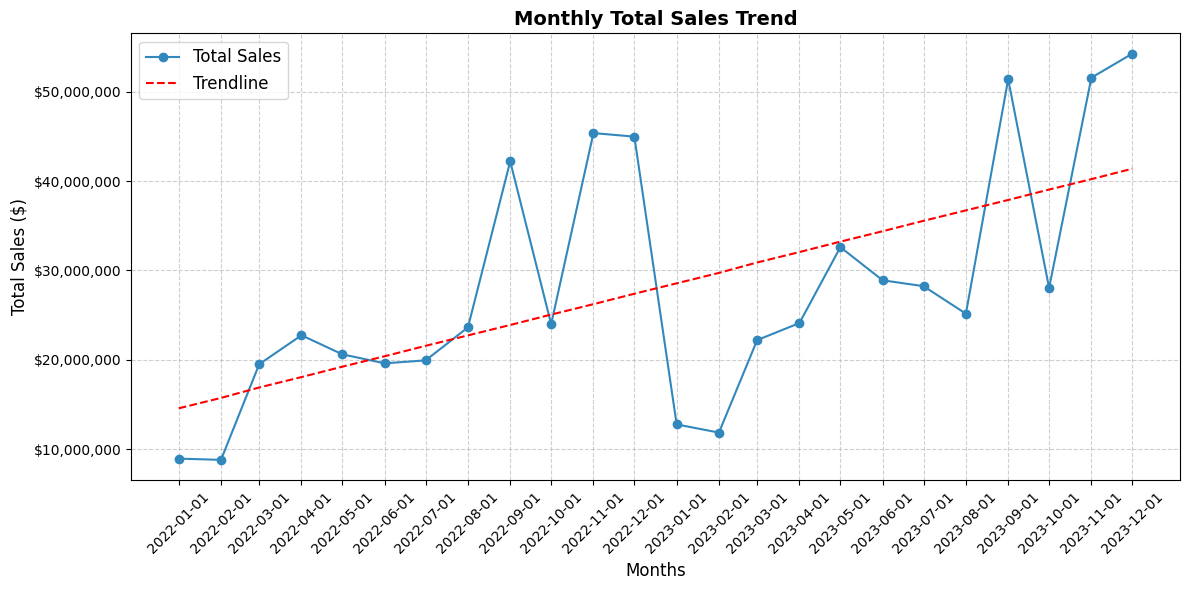

In [ ]:
 # Convert 'Date' to monthly period and calculate monthly sum of prices
df['Month'] = df['Date'].dt.to_period('M')  # Convert 'Date' to monthly period
monthly_sum_price = df.groupby('Month')['Price ($)'].sum().reset_index()

 # Convert 'Month' back to datetime for plotting
monthly_sum_price['Month'] = monthly_sum_price['Month'].dt.to_timestamp()

# Ensure all months in the data range are shown on the x-axis
all_months = pd.date_range(start=monthly_sum_price['Month'].min(),
end=monthly_sum_price['Month'].max(),
freq='MS'  # Month Start frequency
)

# Create the trendline using linear regression
x = np.arange(len(monthly_sum_price['Month']))  # Numeric values for months
y = monthly_sum_price['Price ($)']  # Total sales
trend = np.polyfit(x, y, 1)  # Linear fit (degree=1)
trendline = np.poly1d(trend)(x)  # Create trendline values

# Plotting the monthly sum price trend
plt.figure(figsize=(12, 6))
plt.plot(monthly_sum_price['Month'], monthly_sum_price['Price ($)'], marker='o', linestyle='-', color='#3288BD', label='Total Sales')
plt.plot(monthly_sum_price['Month'], trendline, linestyle='--', color='red', label='Trendline')


plt.title('Monthly Total Sales Trend', fontsize=14, fontweight='bold')
plt.xlabel('Months', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Set x-axis ticks to display every month
plt.xticks(all_months, rotation=45, fontsize=10)

# Fix y-axis formatting to show complete dollar amounts
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))

# Add legend
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()


In [ ]:
# Convert 'Date' column to datetime if it's not already
df['Date'] = pd.to_datetime(df['Date'])

# Extract month and year
df['Month'] = df['Date'].dt.month  # Extract month (1-12)
df['Year'] = df['Date'].dt.year    # Extract year

# Group by month and year, then sum 'Price ($)'
monthly_sale = df.groupby(['Month', 'Year'])['Price ($)'].sum().reset_index()

# Now, group by month only and sum across years
sum_by_month = monthly_sale.groupby('Month')['Price ($)'].sum().reset_index()

total_price = df['Price ($)'].sum()

sum_by_month['seasonal index'] = sum_by_month['Price ($)'] / (total_price/12)

sum_by_month

Month  Price ($)  seasonal index
0       1   21696218        0.387706
1       2   20643945        0.368902
2       3   41705873        0.745274
3       4   46864434        0.837456
4       5   53221243        0.951051
5       6   48505902        0.866789
6       7   48178032        0.860930
7       8   48793638        0.871931
8       9   93635178        1.673238
9      10   52035265        0.929858
10     11   96979678        1.733004
11     12   99266059        1.773861

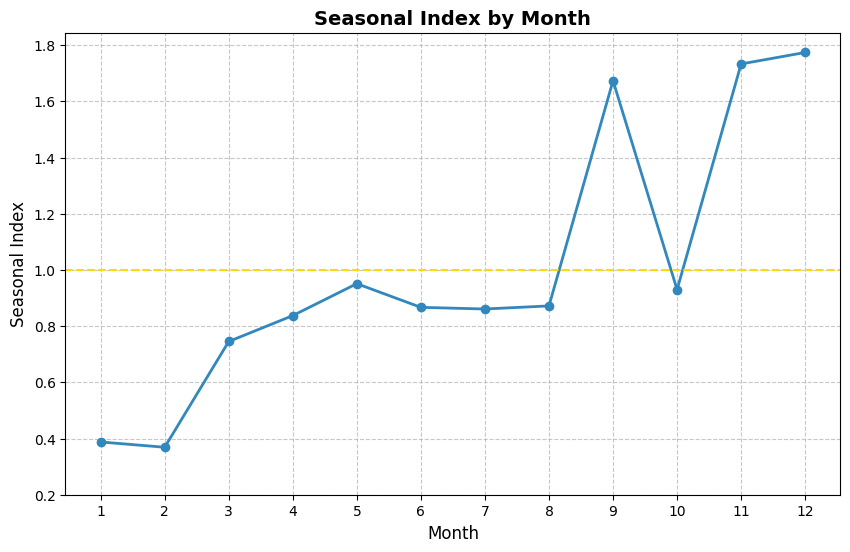

In [ ]:
# Visualise the Seasonal index
plt.figure(figsize=(10, 6))
plt.plot(sum_by_month['Month'], sum_by_month['seasonal index'], marker='o', linestyle='-', linewidth=2, color='#3288BD')
plt.axhline(y=1, color='#FDDA0D', linestyle='--', linewidth=1.5)  # Red reference line
plt.ylim(0.2, None)
plt.title('Seasonal Index by Month', fontsize=14, fontweight='bold', color='black')
plt.xlabel('Month', fontsize=12, color='black')
plt.ylabel('Seasonal Index', fontsize=12, color='black')
plt.xticks(range(1, 13), fontsize=10, color='black')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# **Region Sale**

In [ ]:
# Corrected URL to access the raw data.
url = 'https://raw.githubusercontent.com/WinNatch/Programming-Analytics-/main/Region_Latitude_Longitude.csv'
# Added encoding='latin-1' to handle the problematic character
long_la_data = pd.read_csv(url, encoding='latin-1')

long_la_data

Region   Latitude    Longitude
0      Aurora  39.710835    -104.8125
1      Austin  30.266666    -97.73333
2  Greenville  34.852619  ?-82.394012
3  Janesville  42.682790    -89.01872
4  Middletown  41.562794    -72.68161
5       Pasco  28.189453   -82.349396
6  Scottsdale  33.501324  -111.925278

In [ ]:
# Assuming you have two DataFrames: df and long_la_data
merged_df = df.merge(long_la_data, left_on='Dealer_Region', right_on='Region', how='left')
merged_df

Date  Gender  Annual Income    Company       Model  \
0     2022-01-02    Male          13500       Ford  Expedition   
1     2022-01-02    Male        1480000      Dodge     Durango   
2     2022-01-02    Male        1035000   Cadillac    Eldorado   
3     2022-01-02    Male          13500     Toyota      Celica   
4     2022-01-02    Male        1465000      Acura          TL   
...          ...     ...            ...        ...         ...   
23901 2023-12-31    Male          13500   Plymouth     Voyager   
23902 2023-12-31  Female         900000  Chevrolet       Prizm   
23903 2023-12-31    Male         705000        BMW        328i   
23904 2023-12-31    Male          13500  Chevrolet       Metro   
23905 2023-12-31    Male        1225000      Lexus       ES300   

                          Engine Transmission       Color  Price ($)  \
0      DoubleÂ Overhead Camshaft         Auto       Black      26000   
1      DoubleÂ Overhead Camshaft         Auto       Black      19000   
2              Overhead Camshaft       Manual         Red      31500   
3              Overhead Camshaft       Manual  Pale White      14000   
4      DoubleÂ Overhead Camshaft         Auto         Red      24500   
...                          ...          ...         ...        ...   
23901          Overhead Camshaft       Manual         Red      12000   
23902  DoubleÂ Overhead Camshaft         Auto       Black      16000   
23903          Overhead Camshaft       Manual         Red      21000   
23904  DoubleÂ Overhead Camshaft         Auto       Black      31000   
23905  DoubleÂ Overhead Camshaft         Auto  Pale White      27500   

      Body Style Dealer_Region  Month  Year      Region   Latitude  \
0            SUV    Middletown      1  2022  Middletown  41.562794   
1            SUV        Aurora      1  2022      Aurora  39.710835   
2      Passenger    Greenville      1  2022  Greenville  34.852619   
3            SUV         Pasco      1  2022       Pasco  28.189453   
4      Hatchback    Janesville      1  2022  Janesville  42.682790   
...          ...           ...    ...   ...         ...        ...   
23901  Passenger         Pasco     12  2023       Pasco  28.189453   
23902    Hardtop    Middletown     12  2023  Middletown  41.562794   
23903      Sedan    Scottsdale     12  2023  Scottsdale  33.501324   
23904  Passenger        Austin     12  2023      Austin  30.266666   
23905    Hardtop    Middletown     12  2023  Middletown  41.562794   

         Longitude  
0        -72.68161  
1        -104.8125  
2      ?-82.394012  
3       -82.349396  
4        -89.01872  
...            ...  
23901   -82.349396  
23902    -72.68161  
23903  -111.925278  
23904    -97.73333  
23905    -72.68161  

[23906 rows x 16 columns]

In [ ]:
# Convert the 'Latitude' column to numeric
merged_df['Latitude'] = pd.to_numeric(merged_df['Latitude'], errors='coerce')

# Convert the 'Longitude' column to string type first to handle the problematic character
merged_df['Longitude'] = merged_df['Longitude'].astype(str).str.replace('?-', '-', regex=False)

# Convert the 'Longitude' column to numeric after cleaning
merged_df['Longitude'] = pd.to_numeric(merged_df['Longitude'], errors='coerce')

# Creating the GeoDataFrame
g_merged_df = gpd.GeoDataFrame(merged_df, geometry=gpd.points_from_xy(merged_df.Longitude, merged_df.Latitude))
g_merged_df

Date  Gender  Annual Income    Company       Model  \
0     2022-01-02    Male          13500       Ford  Expedition   
1     2022-01-02    Male        1480000      Dodge     Durango   
2     2022-01-02    Male        1035000   Cadillac    Eldorado   
3     2022-01-02    Male          13500     Toyota      Celica   
4     2022-01-02    Male        1465000      Acura          TL   
...          ...     ...            ...        ...         ...   
23901 2023-12-31    Male          13500   Plymouth     Voyager   
23902 2023-12-31  Female         900000  Chevrolet       Prizm   
23903 2023-12-31    Male         705000        BMW        328i   
23904 2023-12-31    Male          13500  Chevrolet       Metro   
23905 2023-12-31    Male        1225000      Lexus       ES300   

                          Engine Transmission       Color  Price ($)  \
0      DoubleÂ Overhead Camshaft         Auto       Black      26000   
1      DoubleÂ Overhead Camshaft         Auto       Black      19000   
2              Overhead Camshaft       Manual         Red      31500   
3              Overhead Camshaft       Manual  Pale White      14000   
4      DoubleÂ Overhead Camshaft         Auto         Red      24500   
...                          ...          ...         ...        ...   
23901          Overhead Camshaft       Manual         Red      12000   
23902  DoubleÂ Overhead Camshaft         Auto       Black      16000   
23903          Overhead Camshaft       Manual         Red      21000   
23904  DoubleÂ Overhead Camshaft         Auto       Black      31000   
23905  DoubleÂ Overhead Camshaft         Auto  Pale White      27500   

      Body Style Dealer_Region  Month  Year      Region   Latitude  \
0            SUV    Middletown      1  2022  Middletown  41.562794   
1            SUV        Aurora      1  2022      Aurora  39.710835   
2      Passenger    Greenville      1  2022  Greenville  34.852619   
3            SUV         Pasco      1  2022       Pasco  28.189453   
4      Hatchback    Janesville      1  2022  Janesville  42.682790   
...          ...           ...    ...   ...         ...        ...   
23901  Passenger         Pasco     12  2023       Pasco  28.189453   
23902    Hardtop    Middletown     12  2023  Middletown  41.562794   
23903      Sedan    Scottsdale     12  2023  Scottsdale  33.501324   
23904  Passenger        Austin     12  2023      Austin  30.266666   
23905    Hardtop    Middletown     12  2023  Middletown  41.562794   

        Longitude                     geometry  
0      -72.681610   POINT (-72.68161 41.56279)  
1     -104.812500   POINT (-104.8125 39.71084)  
2      -82.394012   POINT (-82.39401 34.85262)  
3      -82.349396    POINT (-82.3494 28.18945)  
4      -89.018720   POINT (-89.01872 42.68279)  
...           ...                          ...  
23901  -82.349396    POINT (-82.3494 28.18945)  
23902  -72.681610   POINT (-72.68161 41.56279)  
23903 -111.925278  POINT (-111.92528 33.50132)  
23904  -97.733330   POINT (-97.73333 30.26667)  
23905  -72.681610   POINT (-72.68161 41.56279)  

[23906 rows x 17 columns]

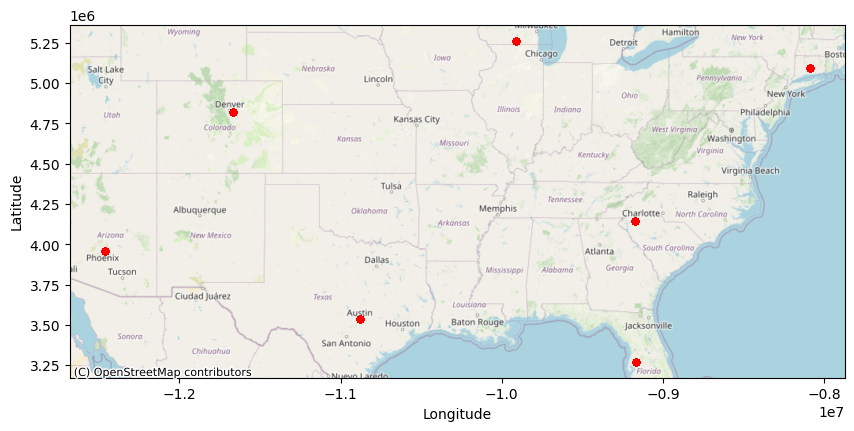

In [ ]:
'''
1. WGS84 (EPSG:4326) is a standard lat/lon coordinate system, which is commonly used for GPS data.
2. Mercator (EPSG:3857) projection is needed for web mapping and aligns with contextily basemaps.
'''
# Instead of set_crs, use to_crs with allow_override=True or without setting the CRS initially
# g_merged_df = g_merged_df.set_crs("EPSG:4326")
# Set the initial CRS to WGS84 (EPSG:4326) assuming your latitude/longitude are in this system
g_merged_df = g_merged_df.set_crs("EPSG:4326")

# Now you can transform to Mercator (EPSG:3857) if needed
g_merged_df = g_merged_df.to_crs(epsg=3857)


# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the data on the single axis
g_merged_df.plot(
    ax=ax,
    color='red',
    markersize=20,
    alpha=0.6
)

# Add the basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Set axis labels
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.show()

<ipython-input-22-930c165b430b>:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis')  # Choose a colormap from matplotlib


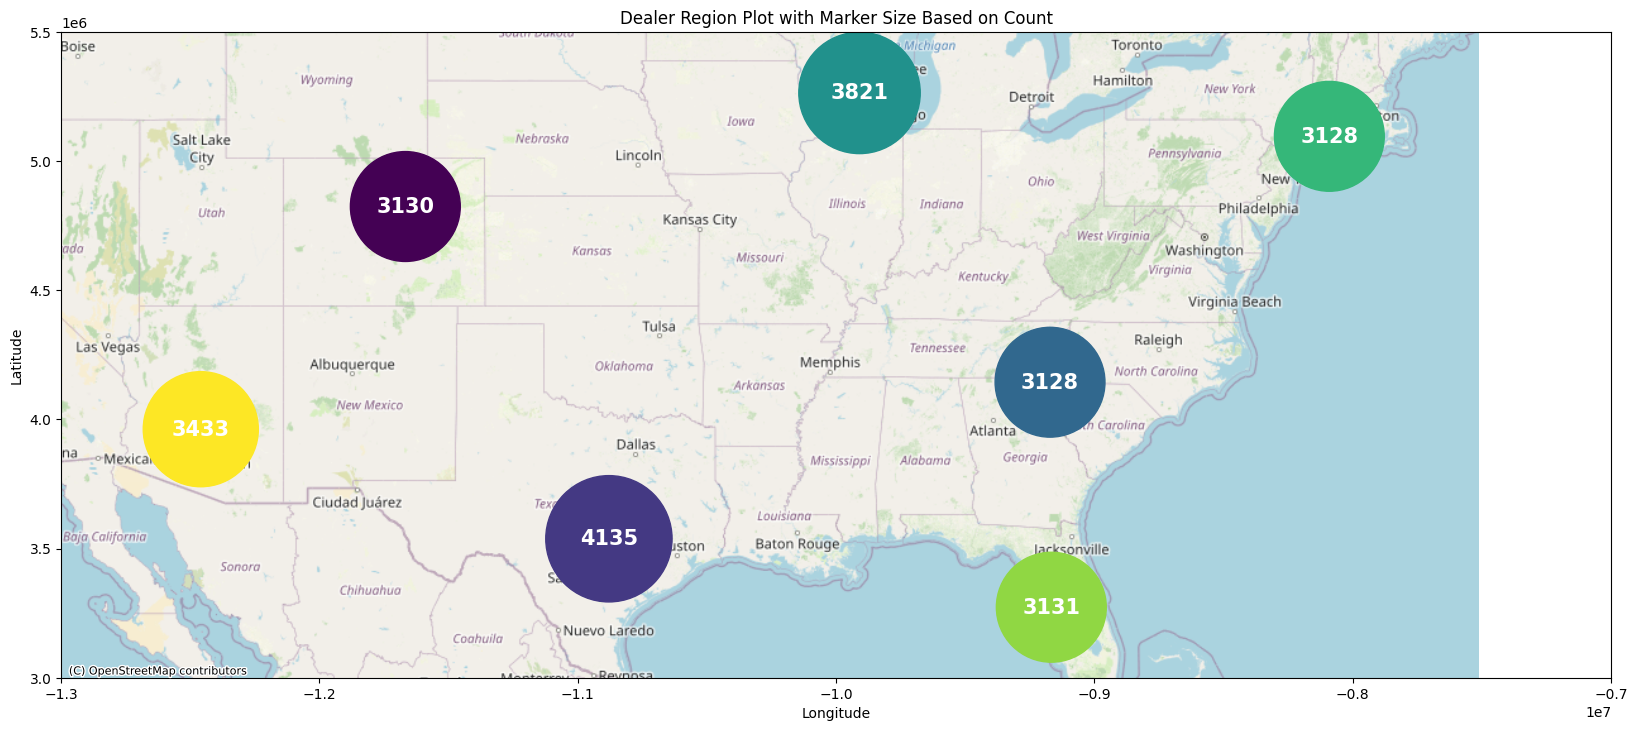

In [ ]:
# Group data by region, longitude, and latitude to count occurrences
df_grouped = g_merged_df.groupby(['Dealer_Region', 'Longitude', 'Latitude']).size().reset_index(name='count')

# Create a GeoDataFrame using longitude and latitude columns to define geometry points
gdf = gpd.GeoDataFrame(
  df_grouped,
  geometry=gpd.points_from_xy(df_grouped['Longitude'], df_grouped['Latitude']),
  crs="EPSG:4326"  # Set CRS to WGS84
)

# Now you can transform to Mercator (EPSG:3857) for web mapping compatibility
gdf = gdf.to_crs(epsg=3857)

# Create a colormap object (replace 'viridis' with your desired colormap)
cmap = cm.get_cmap('viridis')  # Choose a colormap from matplotlib

# Create a figure and axis
fig, ax = plt.subplots(figsize=(20, 16))

# Plot the data on the single axis with marker size based on the 'count' column
gdf.plot(
  ax=ax,
  column='Dealer_Region',  # Assign the 'Dealer_Region' column for color assignment
  markersize=gdf['count'] * 2,  # Adjust the multiplier to change marker sizes accordingly
  alpha=1,
  cmap=cmap  # Assign the colormap object 'cmap' to the colormap argument
)

# Add the count number on each marker
for x, y, label in zip(gdf.geometry.x, gdf.geometry.y, gdf['count']):
  ax.text(x, y, str(label), fontsize=15, ha='center', va='center', color='white', weight='bold')

# Add the basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Set axis labels
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Set axis limits to zoom out
ax.set_xlim(-1.3e7, -0.7e7)  # Adjust these values to control the zoom level
ax.set_ylim(3.0e6, 5.5e6)

plt.title("Dealer Region Plot with Marker Size Based on Count")
plt.show()

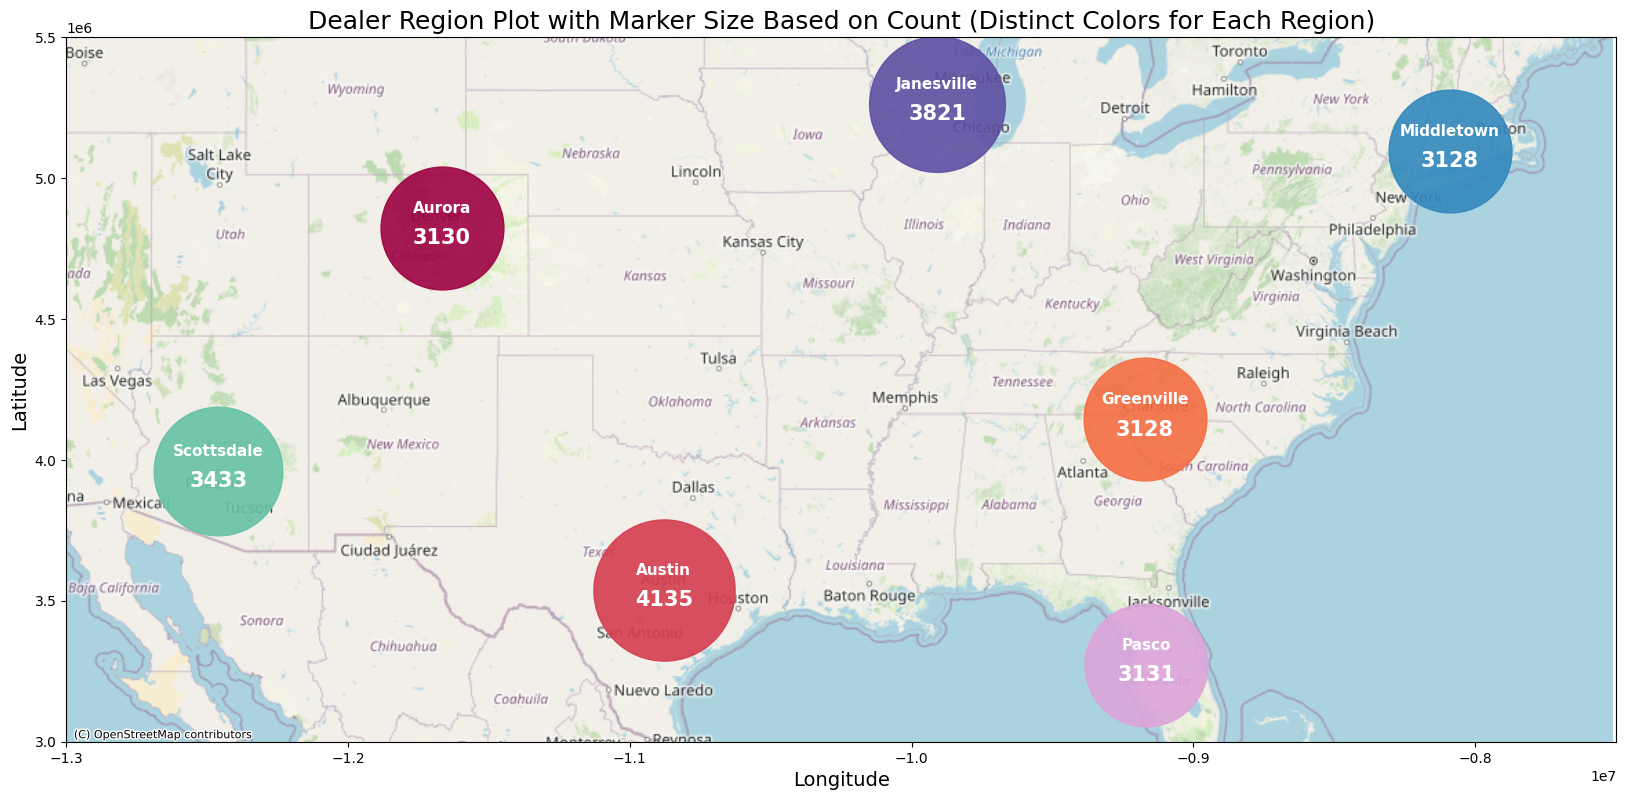

In [ ]:
# Assuming g_merged_df has 'Dealer_Region', 'Longitude', 'Latitude' columns
# Group data by region, longitude, and latitude to count occurrences
df_grouped = g_merged_df.groupby(['Dealer_Region', 'Longitude', 'Latitude']).size().reset_index(name='count')

# Create a GeoDataFrame using longitude and latitude columns to define geometry points
gdf = gpd.GeoDataFrame(
  df_grouped,
  geometry=gpd.points_from_xy(df_grouped['Longitude'], df_grouped['Latitude']),
  crs="EPSG:4326"  # Set CRS to WGS84
)

# Now you can transform to Mercator (EPSG:3857) for web mapping compatibility
gdf = gdf.to_crs(epsg=3857)

# Define your custom colors for each region
region_colors = {
    'Aurora': '#9E0142',
    'Janesville': '#5E4fA2',
    'Middletown': '#3288BD',
    'Scottsdale': '#66C2A5',
    'Greenville': '#F46D43',
    'Austin':'#D53E4F',
    'Pasco':'#DDA4DA',
    # Add more regions and colors as needed
}

# Create a figure and axis
fig, ax = plt.subplots(figsize=(20, 16))

# Plot each region with a distinct color
for region in gdf['Dealer_Region'].unique():
    region_data = gdf[gdf['Dealer_Region'] == region]
    region_color = region_colors.get(region, '#000000')  # Default to black if the region is not in the dictionary
    region_data.plot(
        ax=ax,
        color=region_color,  # Use the specific color for each region
        markersize=region_data['count'] * 2.5,  # Adjust marker size to be more visually distinguishable
        alpha=0.9,
        label=region
    )

# Add the count number inside each marker
for x, y, count in zip(gdf.geometry.x, gdf.geometry.y, gdf['count']):
    ax.text(x, y, str(count), fontsize=15, ha='center', va='top', color='white', weight='bold')

# Add the region name label outside each marker (slightly above or to the side)
for x, y, region in zip(gdf.geometry.x, gdf.geometry.y, gdf['Dealer_Region']):
    ax.text(x, y + 70000, region, fontsize=11, ha='center', va='center', color='white', weight='bold')  # Offset to position label outside marker

# Add the basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Set axis labels
ax.set_xlabel('Longitude', fontsize=14)
ax.set_ylabel('Latitude', fontsize=14)

# Set title and legend
plt.title("Dealer Region Plot with Marker Size Based on Count (Distinct Colors for Each Region)", fontsize=18)


# Set axis limits to zoom out (adjust these values as needed)
ax.set_xlim(-1.3e7, -0.75e7)  # These are examples, adjust as needed for your data
ax.set_ylim(3.0e6, 5.5e6)

plt.show()

In [ ]:
# Add a 'Month' column to car_data for monthly aggregation
df['Date'] = pd.to_datetime(df['Date'])  # Convert 'Date' column to datetime
df['Month'] = df['Date'].dt.to_period('M')

# Calculate the monthly sum of prices grouped by Dealer_Region
monthly_region_sum = df.groupby(['Month', 'Dealer_Region'])['Price ($)'].sum().reset_index()

# Convert 'Month' back to datetime for plotting
monthly_region_sum['Month'] = monthly_region_sum['Month'].dt.to_timestamp()

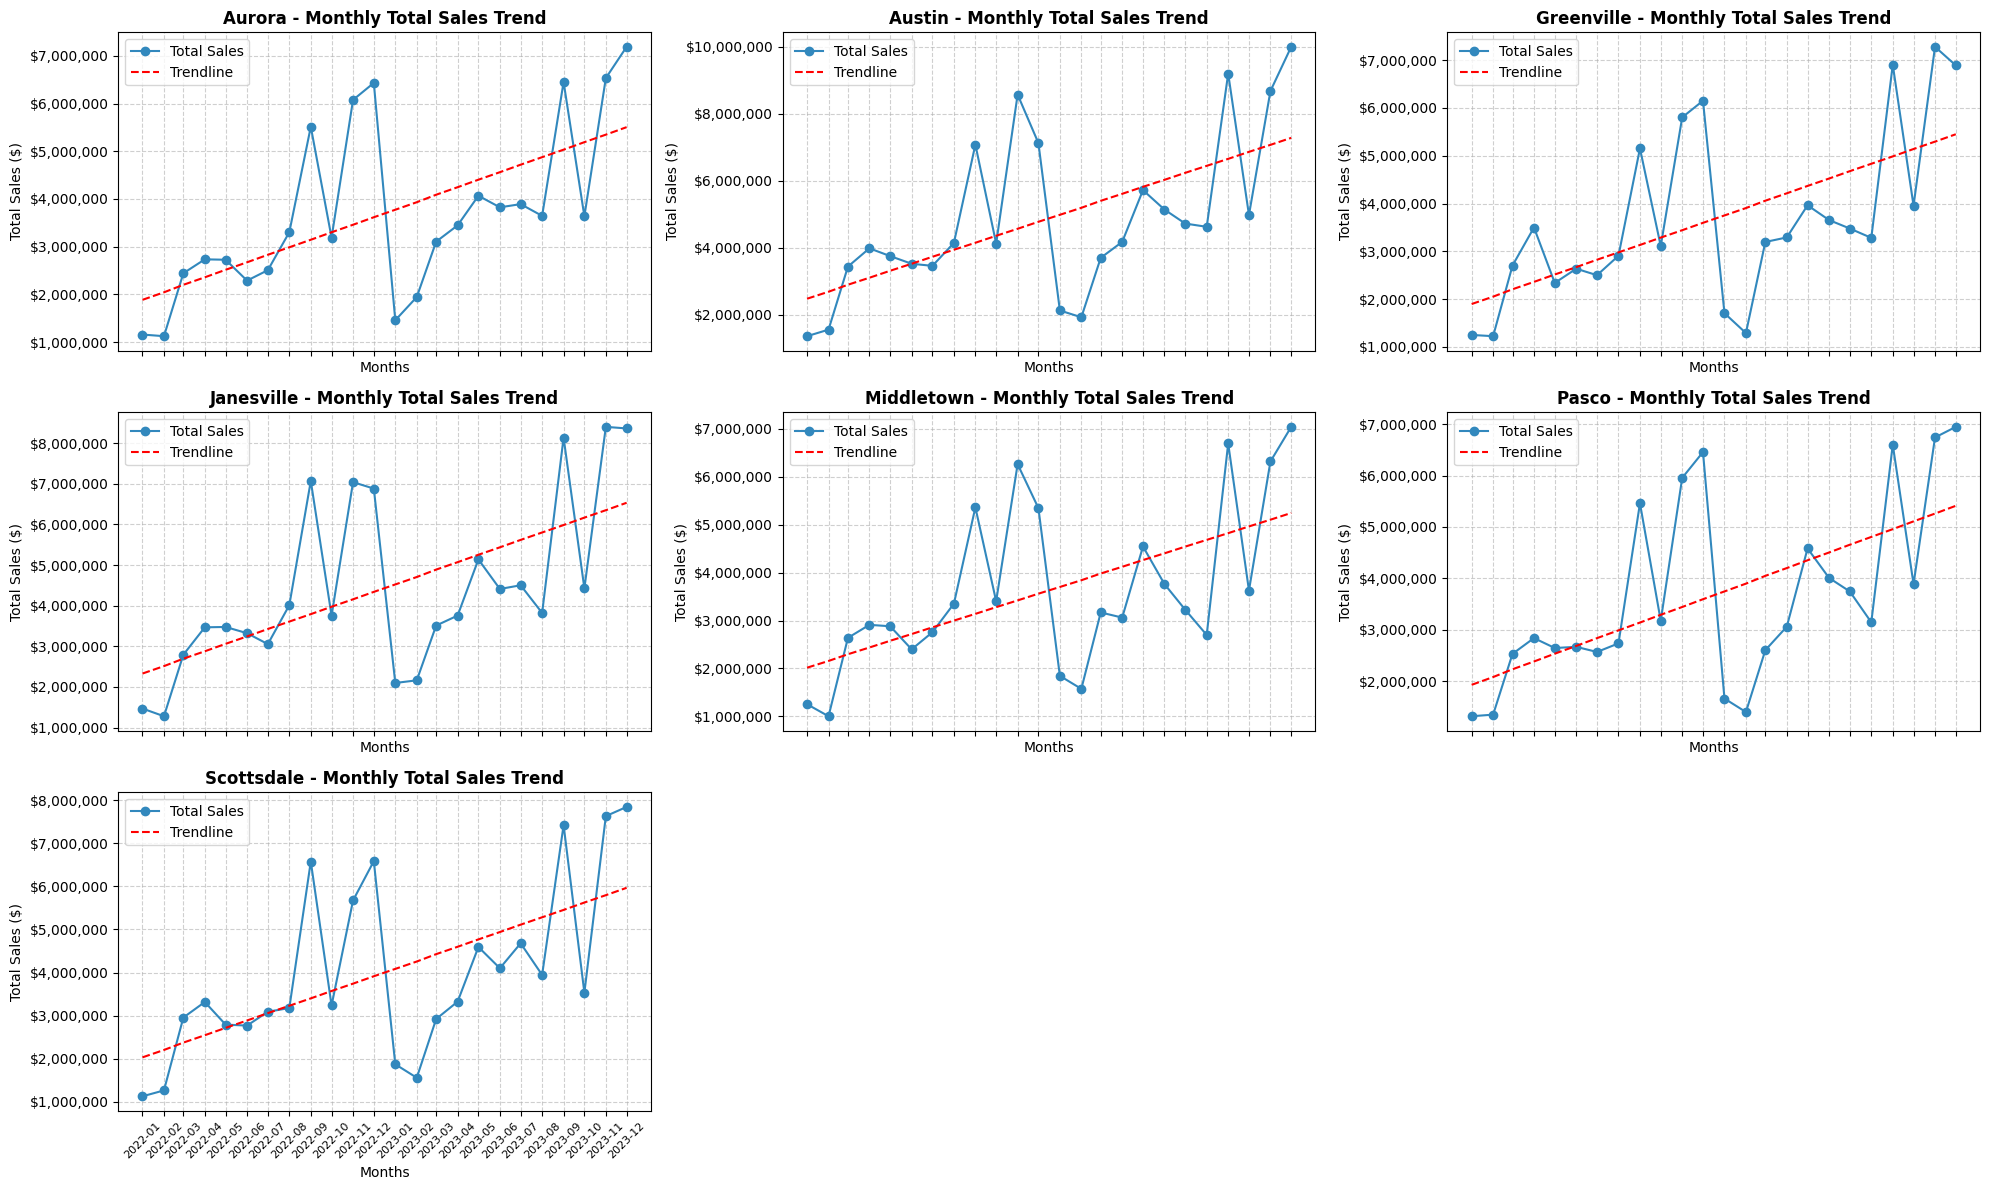

In [ ]:
# Unique dealer regions for creating subplots
dealer_regions = monthly_region_sum['Dealer_Region'].unique()

# Determine the number of rows needed for 3 columns
num_cols = 3
num_rows = (len(dealer_regions) + num_cols - 1) // num_cols

# Set up the subplot grid with 3 columns
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 4), sharex=True)

# Flatten the axes array for easier indexing (handles both 1D and 2D cases)
axes = axes.flatten()

# Function to format the y-axis labels as currency
def format_currency(value, tick_number):
    return f'${value:,.0f}'

# Global months range (assumes all regions share the same time span)
global_months = pd.date_range(
    start=monthly_region_sum['Month'].min(),
    end=monthly_region_sum['Month'].max(),
    freq='MS'  # Month Start frequency
)

# Plot each region's trend in a separate subplot
for idx, region in enumerate(dealer_regions):
    ax = axes[idx]
    region_data = monthly_region_sum[monthly_region_sum['Dealer_Region'] == region]

    # Create the trendline using linear regression
    x = np.arange(len(region_data['Month']))  # Numeric values for months
    y = region_data['Price ($)']
    trend = np.polyfit(x, y, 1)
    trendline = np.poly1d(trend)(x)

    # Plotting
    ax.plot(region_data['Month'], region_data['Price ($)'], marker='o', linestyle='-', color='#3288BD', label='Total Sales')
    ax.plot(region_data['Month'], trendline, linestyle='--', color='red', label='Trendline')

    ax.set_title(f'{region} - Monthly Total Sales Trend', fontsize=12, fontweight='bold')
    ax.set_ylabel('Total Sales ($)', fontsize=10)
    ax.set_xlabel('Months', fontsize=10)
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.legend(fontsize=10)

    # Set x-axis ticks to show every month in the range
    ax.set_xticks(global_months)
    ax.set_xticklabels([month.strftime('%Y-%m') for month in global_months], rotation=45, fontsize=8)

    # Set y-axis to currency format
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_currency))

# Remove any unused subplots
for idx in range(len(dealer_regions), len(axes)):
    fig.delaxes(axes[idx])

# Ensure all plots show consistent x-axis ticks
plt.tight_layout()
plt.show()


# **Customers Demographic**

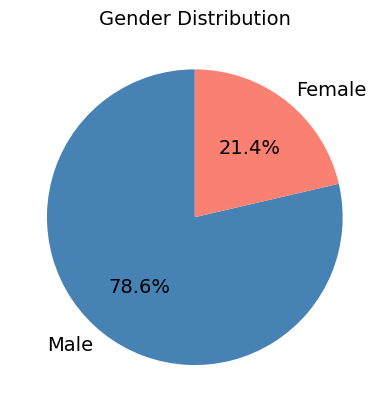

In [ ]:
# Define a custom color palette for genders
custom_palette = {'Male': 'steelblue', 'Female': 'salmon'}

# Create a pie chart to visualize the gender distribution
plt.pie(df['Gender'].value_counts(), labels=df['Gender'].value_counts().index, autopct='%1.1f%%', startangle=90, colors=[custom_palette.get(g, 'gray') for g in df['Gender'].value_counts().index], textprops={'fontsize': 14})
plt.title('Gender Distribution', fontsize=14)

plt.show()

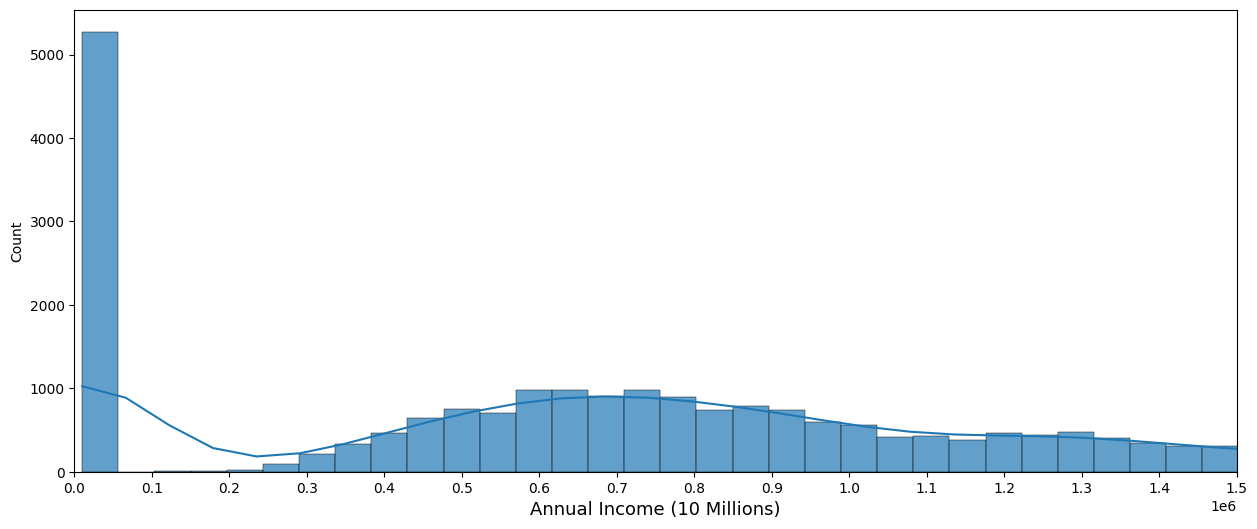

In [ ]:
# Crea
plt.figure(figsize=(15, 6))
sns.histplot(data=df, x='Annual Income', bins=240, kde=True, alpha=0.7)
plt.xlabel("Annual Income (10 Millions)", fontsize=13)

# Set x-axis limits from 0 to 120 million
plt.xlim(0, 1500000)

# Get the current Axes object
ax = plt.gca()

# Increase the number of x-axis ticks
locator = MultipleLocator(100000)
ax.xaxis.set_major_locator(locator)

plt.show()

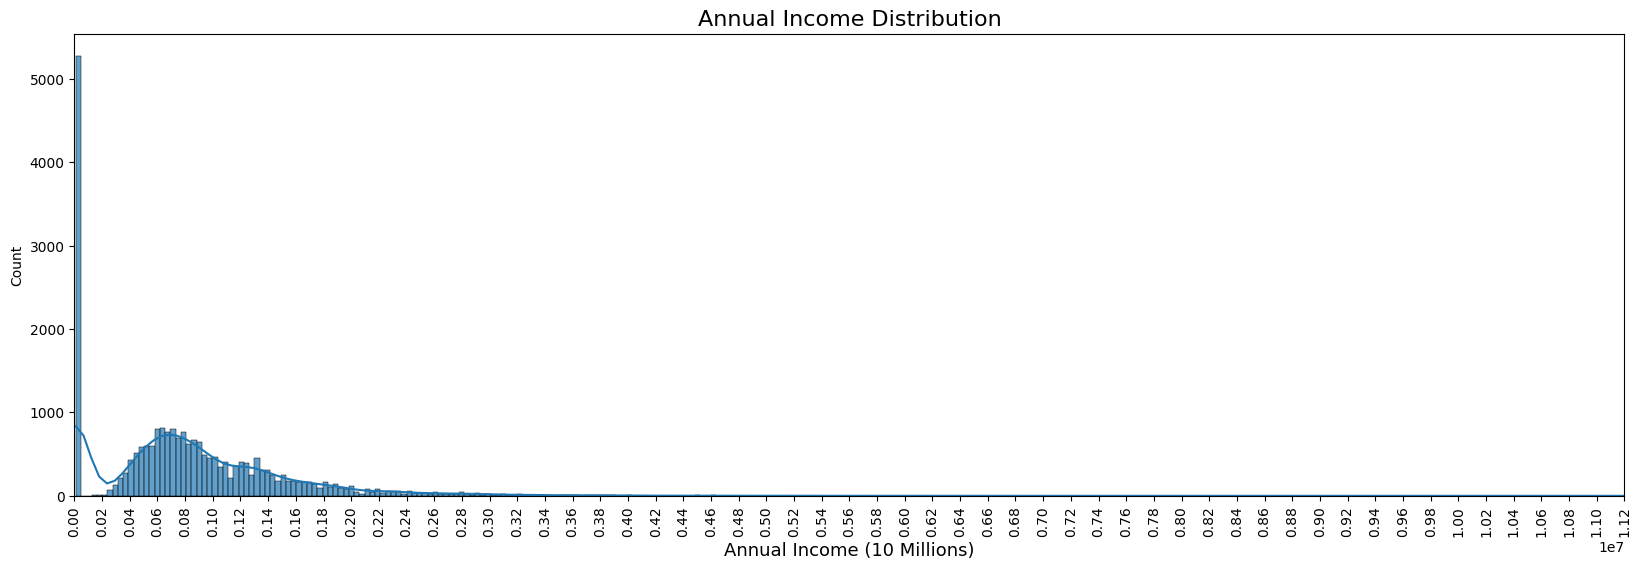

In [ ]:
plt.figure(figsize=(20, 6))
sns.histplot(data=df, x='Annual Income', bins=295, kde=True, alpha=0.7)
plt.xlabel("Annual Income (10 Millions)", fontsize=13)
plt.title('Annual Income Distribution', fontsize=16)
plt.xticks(rotation=90)

# Set x-axis limits from 0 to 120 million
plt.xlim(0, 11200000)

# Get the current Axes object
ax = plt.gca()

# Increase the number of x-axis ticks
locator = MultipleLocator(200000)
ax.xaxis.set_major_locator(locator)

plt.show()

# **Car in the Market**

<ipython-input-34-3987854f1756>:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0, 1].set_yticklabels(['\n'.join(wrap(label.get_text(), 20)) for label in axs[0, 1].get_yticklabels()])


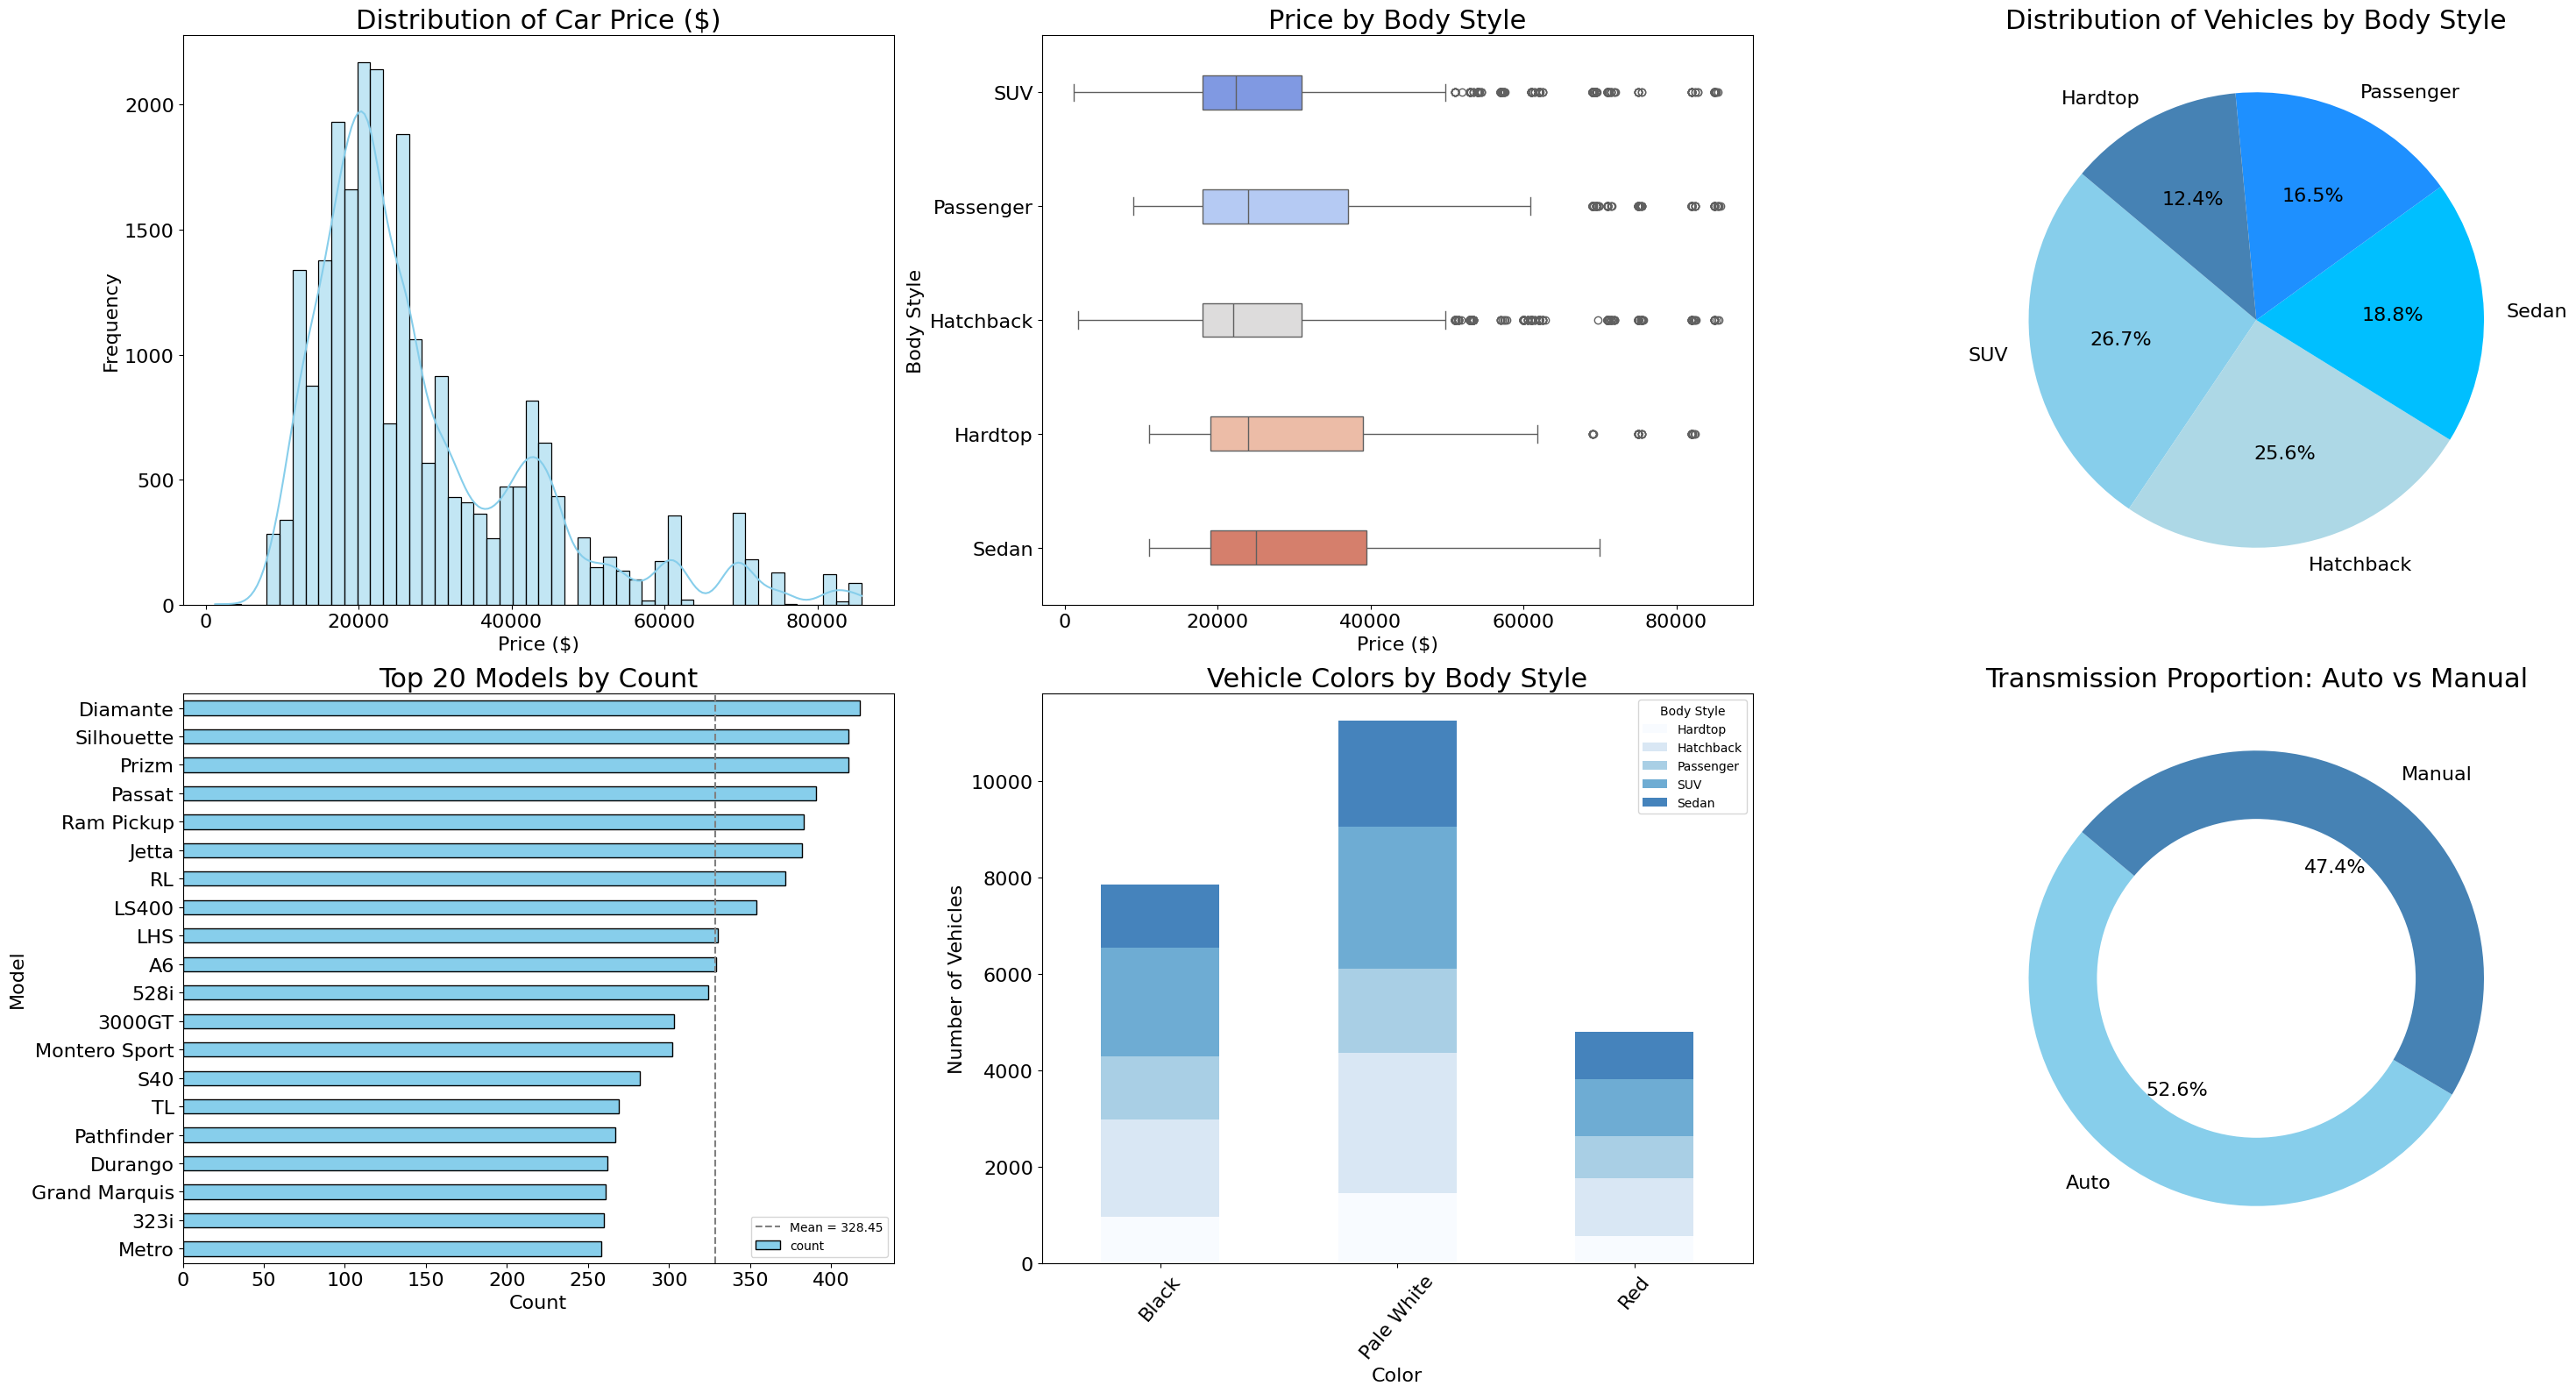

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(30, 16))

# Plot 1: Distribution of Price with trendline
sns.histplot(df['Price ($)'], bins=50, kde=True, color='skyblue', ax=axs[0, 0])
axs[0, 0].set_title('Distribution of Car Price ($)', fontsize=22)
axs[0, 0].set_xlabel('Price ($)')
axs[0, 0].set_ylabel('Frequency')

# Plot 2: Boxplot of Price by Engine
sns.boxplot(data=df, x="Price ($)", y="Body Style", hue='Body Style', palette='coolwarm', ax=axs[0, 1], width=0.3)
axs[0, 1].set_title('Price by Body Style', fontsize=22)
axs[0, 1].set_xlabel('Price ($)')
axs[0, 1].set_ylabel('Body Style')
axs[0, 1].set_yticklabels(['\n'.join(wrap(label.get_text(), 20)) for label in axs[0, 1].get_yticklabels()])

# Plot 3: Pie chart for Body Style distribution
body_style_counts = df['Body Style'].value_counts()
axs[0, 2].pie(body_style_counts, labels=body_style_counts.index, autopct='%1.1f%%', startangle=140,
              colors=['skyblue', 'lightblue', 'deepskyblue', 'dodgerblue', 'steelblue'], textprops={'fontsize': 16})
axs[0, 2].set_title('Distribution of Vehicles by Body Style', fontsize=22)

# Plot 4 : Top 20 models by count with mean line
top_20_models = df['Model'].value_counts().head(20).sort_values(ascending=True)
mean_model_count = top_20_models.mean()
top_20_models.plot(kind='barh', color='skyblue', edgecolor='k', ax=axs[1, 0])
axs[1, 0].axvline(x=mean_model_count, color='grey', linestyle='--', linewidth=1.5, label=f'Mean = {mean_model_count:.2f}')
axs[1, 0].set_title('Top 20 Models by Count', fontsize=22)
axs[1, 0].set_xlabel('Count')
axs[1, 0].set_ylabel('Model')
axs[1, 0].legend()

# Plot 5 : Stacked bar chart for Color and Body Style
color_body_pivot = df.pivot_table(index='Color', columns='Body Style', aggfunc='size', fill_value=0)
color_body_pivot.plot(
    kind='bar', stacked=True, ax=axs[1, 1],
    color=[plt.cm.Blues(i / len(color_body_pivot.columns), alpha=0.8) for i in range(len(color_body_pivot.columns))]
)
axs[1, 1].set_title('Vehicle Colors by Body Style', fontsize=22)
axs[1, 1].tick_params(axis='x', rotation=50)
axs[1, 1].set_xlabel('Color')
axs[1, 1].set_ylabel('Number of Vehicles')

# Plot 6: Pie Chart for Transmission (Auto vs Manual)
transmission_counts = df['Transmission'].value_counts()
axs[1, 2].pie(
    transmission_counts,
    labels=transmission_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=['skyblue', 'steelblue'],
    textprops={'fontsize': 16}
)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

axs[1, 2].set_title('Transmission Proportion: Auto vs Manual', fontsize=22)

# Increase font size for all text elements in subplots (excluding titles)
for ax in axs.flat:  # Iterate through all subplots
    for item in ([ax.xaxis.label, ax.yaxis.label] +
                 ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(16)  # Set desired font size

plt.subplots_adjust(hspace=3)

# Adjust layout
plt.tight_layout()
plt.show()

<Figure size 7000x7000 with 0 Axes>

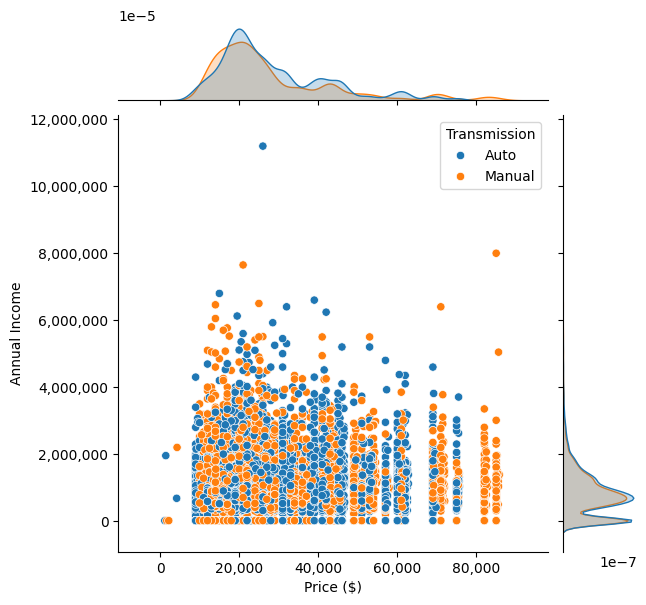

In [ ]:
# Create jointplot for Price, Annual Income, and Transmission
plt.figure(figsize=(70, 70))
g = sns.jointplot(data=df, x='Price ($)', y='Annual Income', hue='Transmission')
g.ax_joint.set_ylabel("Annual Income")

# Format the y-axis labels
g.ax_joint.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
g.ax_joint.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
# This formatter converts the values to comma-separated numbers with 0 decimal places.

plt.show()

<ipython-input-59-66d2d1210b47>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax1, data=df, y='Company', order=company_order, palette='Spectral')
<ipython-input-59-66d2d1210b47>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax2, x=sum_price_by_company.values, y=sum_price_by_company.index, palette='Spectral')


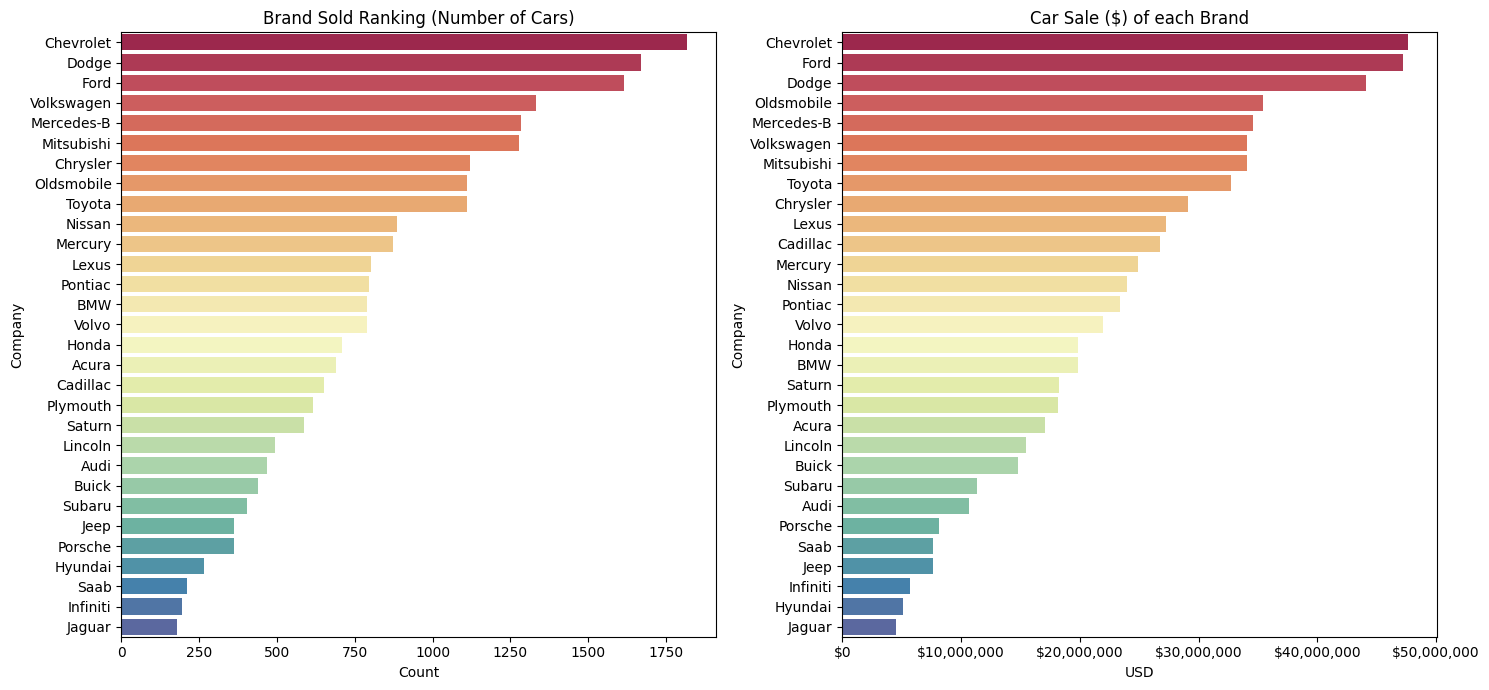

In [ ]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))  # Adjust figsize as needed

# Company order based on frequency (high to low)
company_order = df['Company'].value_counts().index

# ---------- Subplot 1: Count Plot ----------
# Create the countplot with custom color palette and order on the first subplot (ax1)
sns.countplot(ax=ax1, data=df, y='Company', order=company_order, palette='Spectral')
ax1.set_title('Brand Sold Ranking (Number of Cars)')
ax1.set_xlabel('Count')
ax1.set_ylabel('Company')

# ---------- Subplot 2: Bar Plot ----------
sum_price_by_company = df.groupby('Company')['Price ($)'].sum().sort_values(ascending=False)

# Create the barplot with custom color palette and order on the second subplot (ax2)
sns.barplot(ax=ax2, x=sum_price_by_company.values, y=sum_price_by_company.index, palette='Spectral')

# Format x-axis labels with currency symbol and comma separators
formatter = FuncFormatter(lambda x, pos: '${:,.0f}'.format(x))
ax2.xaxis.set_major_formatter(formatter)

ax2.set_title('Car Sale ($) of each Brand')
ax2.set_xlabel('USD')
ax2.set_ylabel('Company')

# Adjust layout to prevent overlapping labels (optional)
plt.tight_layout()

plt.show()

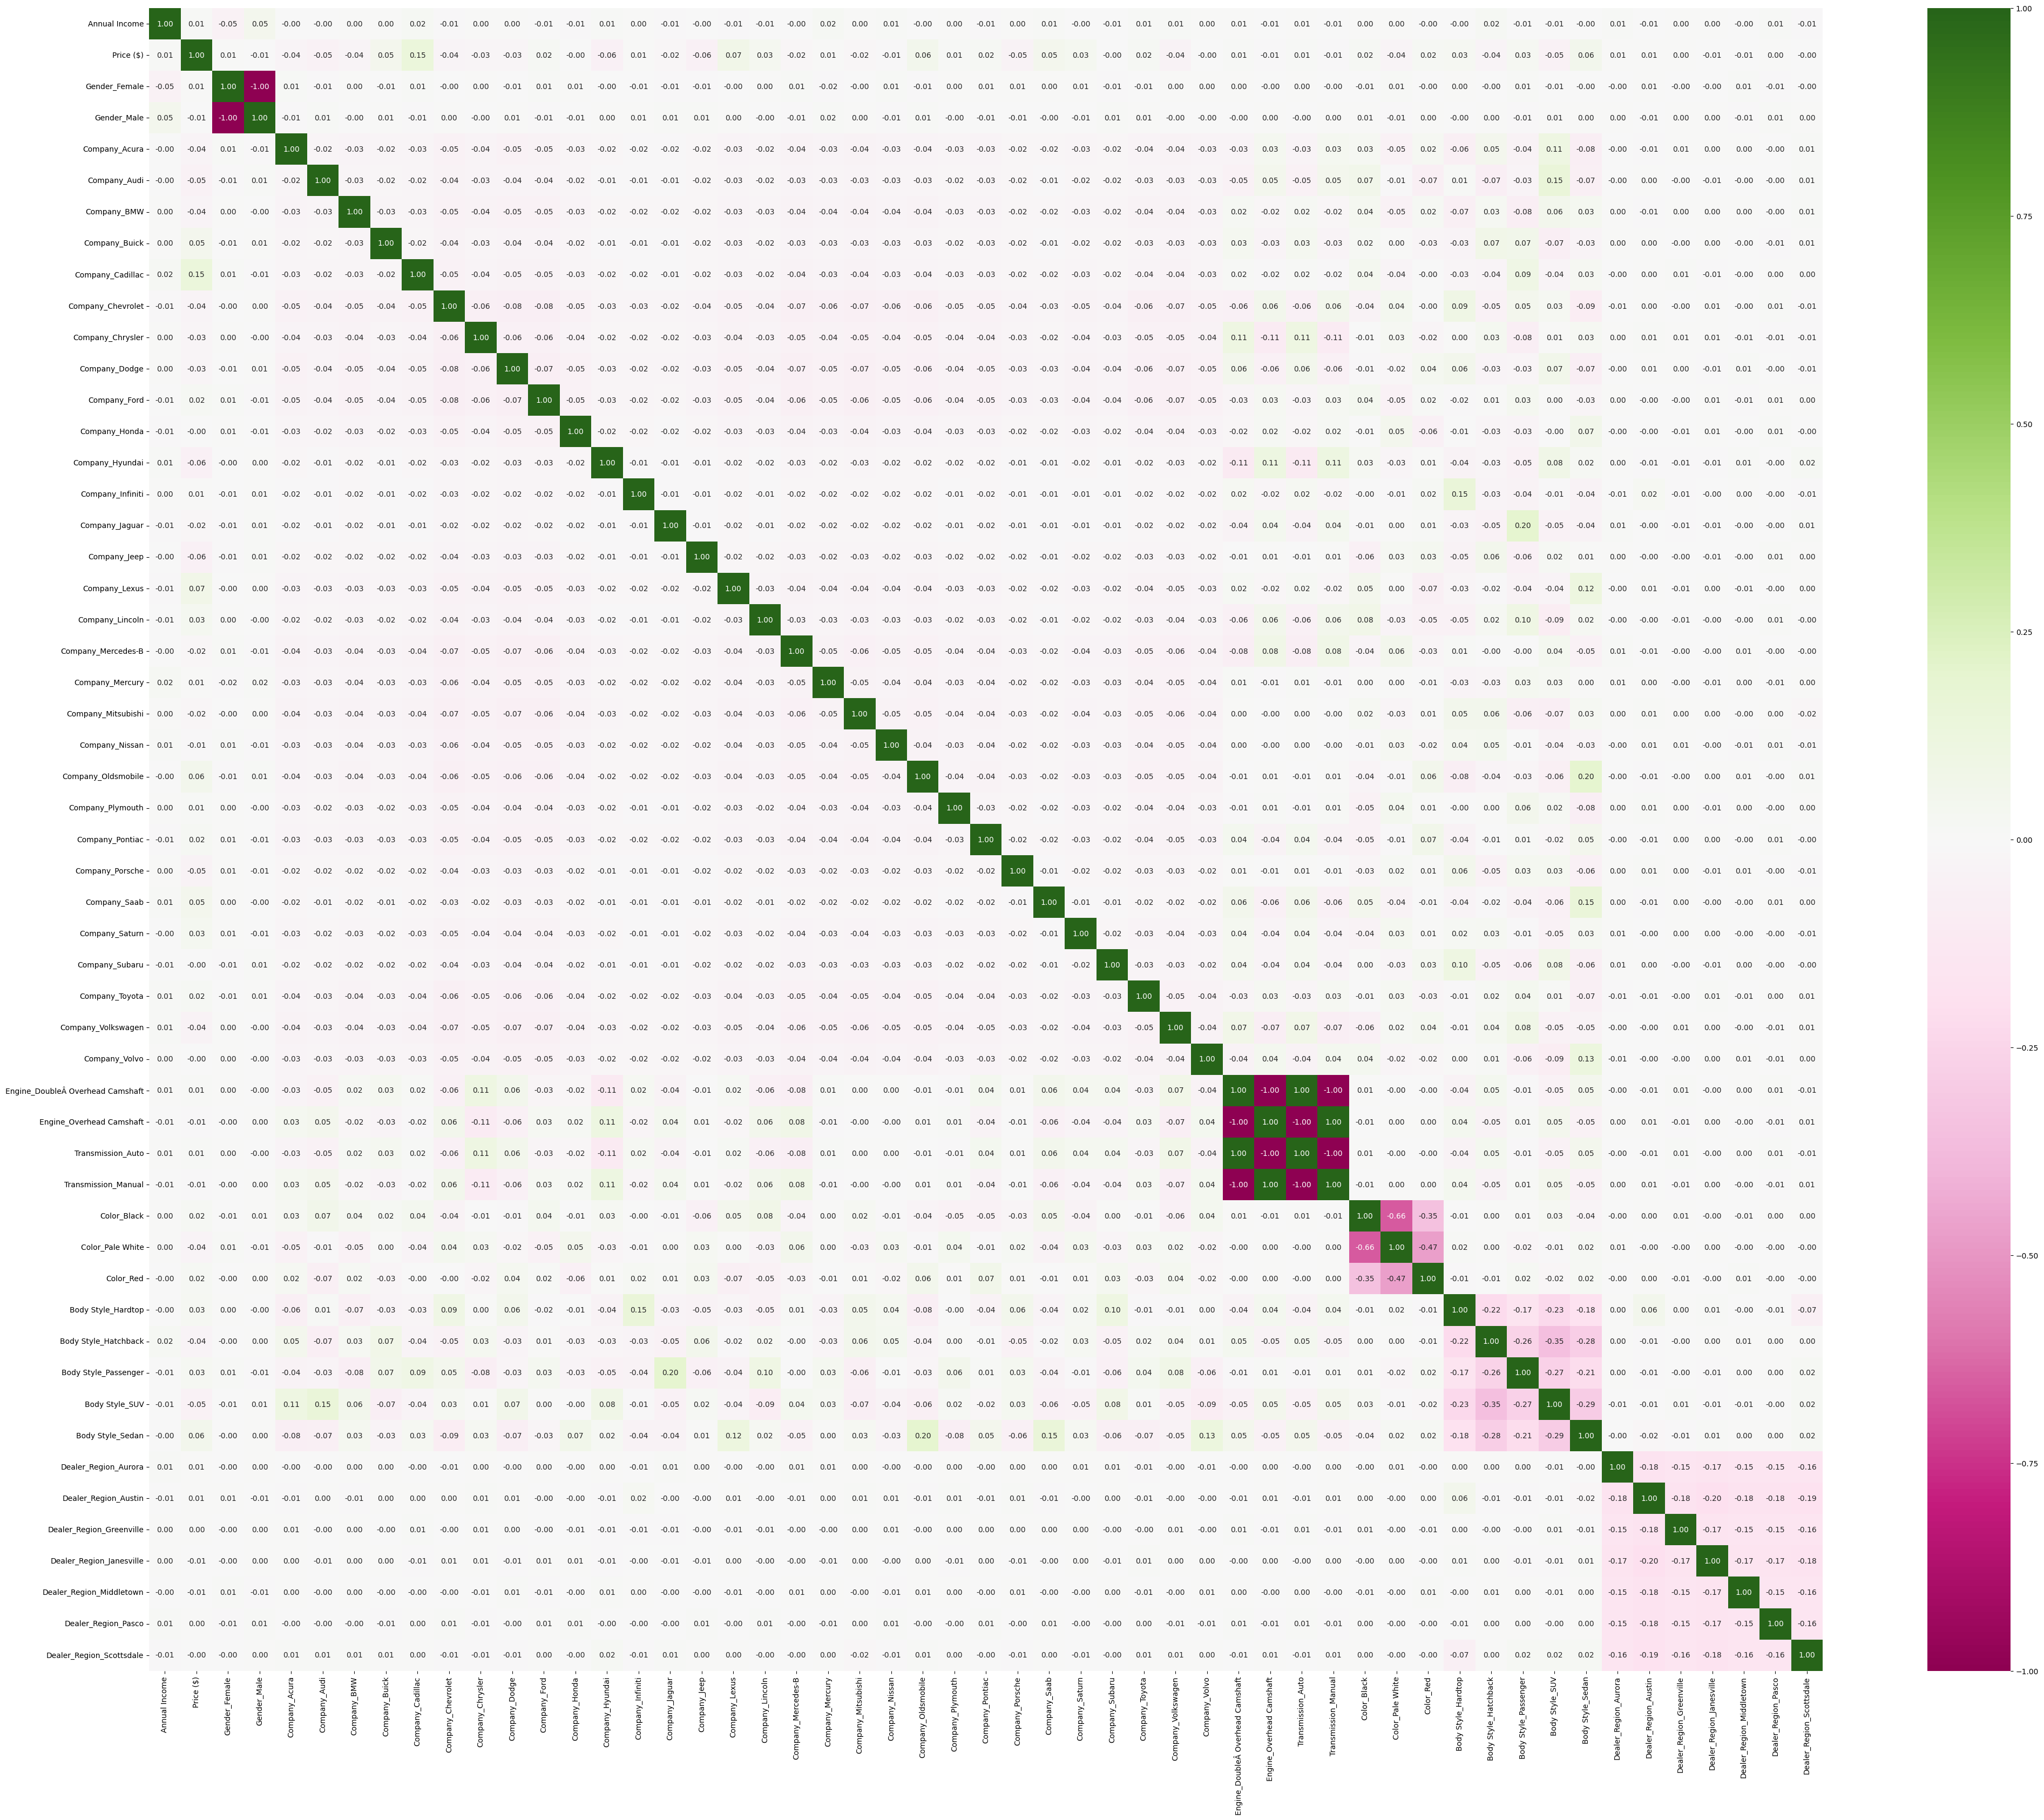

In [ ]:
# Drop Unused Features
df2 = df.drop(['Date','Model','Month','Year'], axis=1, inplace=False)

# Create Dummy for Categorical Features
df_cor_dummies = [i for i in df2.columns if i not in ['Annual Income','Price ($)']]
df_cor = pd.get_dummies(df2, columns=df_cor_dummies, drop_first=False)

# Calculate the Correlation Matrix
corr_matrix = df_cor.corr()

# Plot the Correlation Heatmap
plt.figure(figsize=(50 , 40))
sns.heatmap(corr_matrix, annot=True, cmap="PiYG", fmt='.2f')
plt.show()

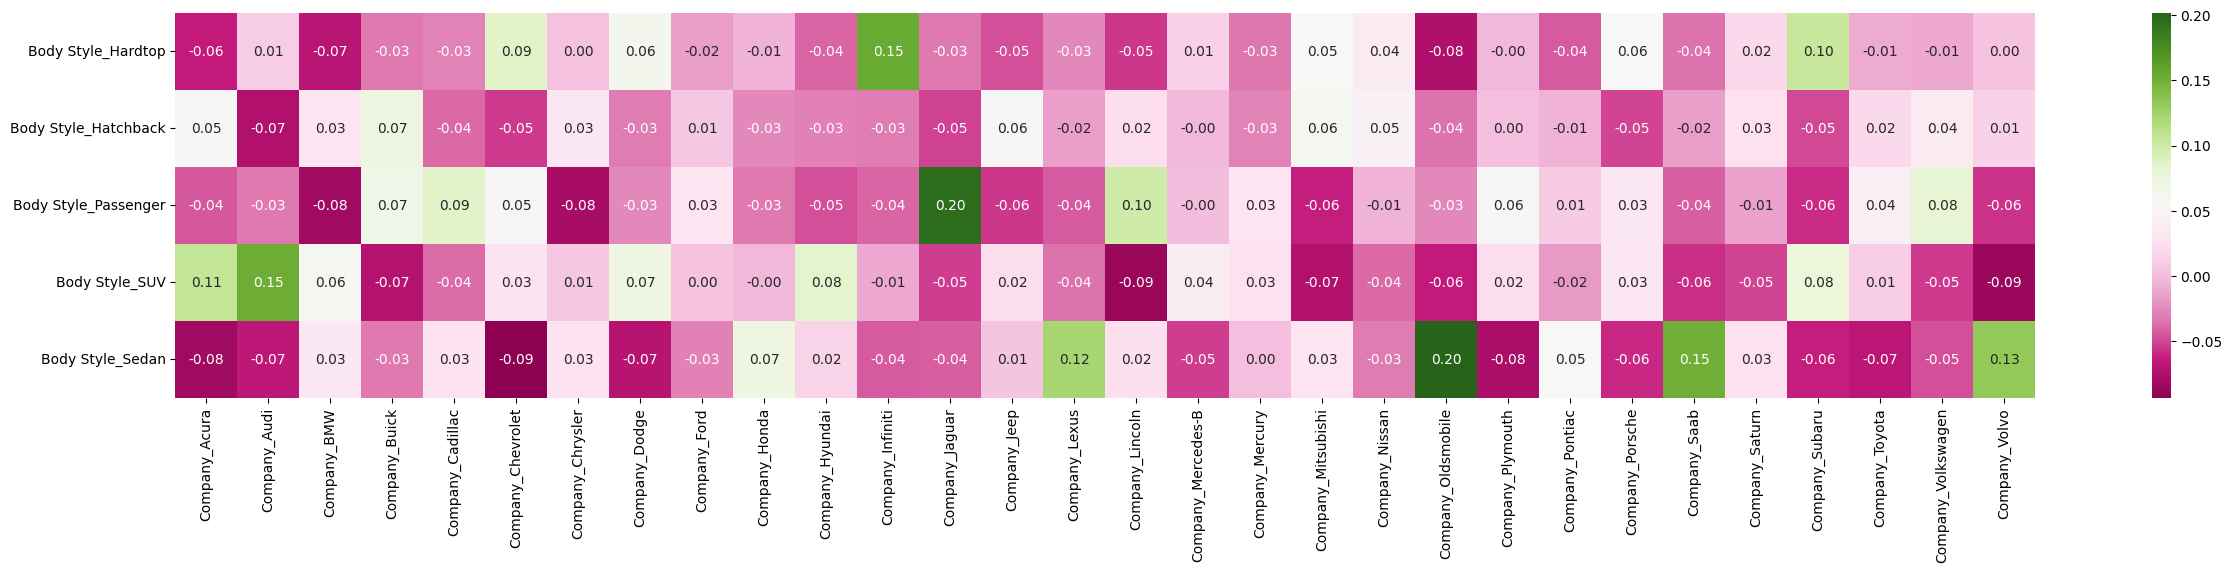

In [ ]:
# Drop Unused Features
df_PvC = df.drop(['Date','Model','Gender','Annual Income','Engine','Transmission','Color','Dealer_Region','Price ($)','Month','Year'], axis=1, inplace=False)

df_cor_dm = [i for i in df_PvC.columns if i not in []]
df_cor_1 = pd.get_dummies(df_PvC, columns=df_cor_dm, drop_first=False)
df_cor_1 = df_cor_1.astype(int)

# Calculate the new Correlation Matrix
corr_matrix_2 = df_cor_1.corr()

# Drop the first 30 rows for easier Visualisation
rows_to_drop = corr_matrix_2.index[:30]
corr_matrix_2 = corr_matrix_2.drop(rows_to_drop)

# Dropping the other columns for easier Visualisation
corr_matrix_2 = corr_matrix_2.drop(['Body Style_Hardtop','Body Style_Hatchback','Body Style_Passenger','Body Style_SUV','Body Style_Sedan'], axis=1, inplace=False)

plt.figure(figsize=(30 , 5))
sns.heatmap(corr_matrix_2, annot=True, cmap="PiYG", fmt='.2f')
plt.show()

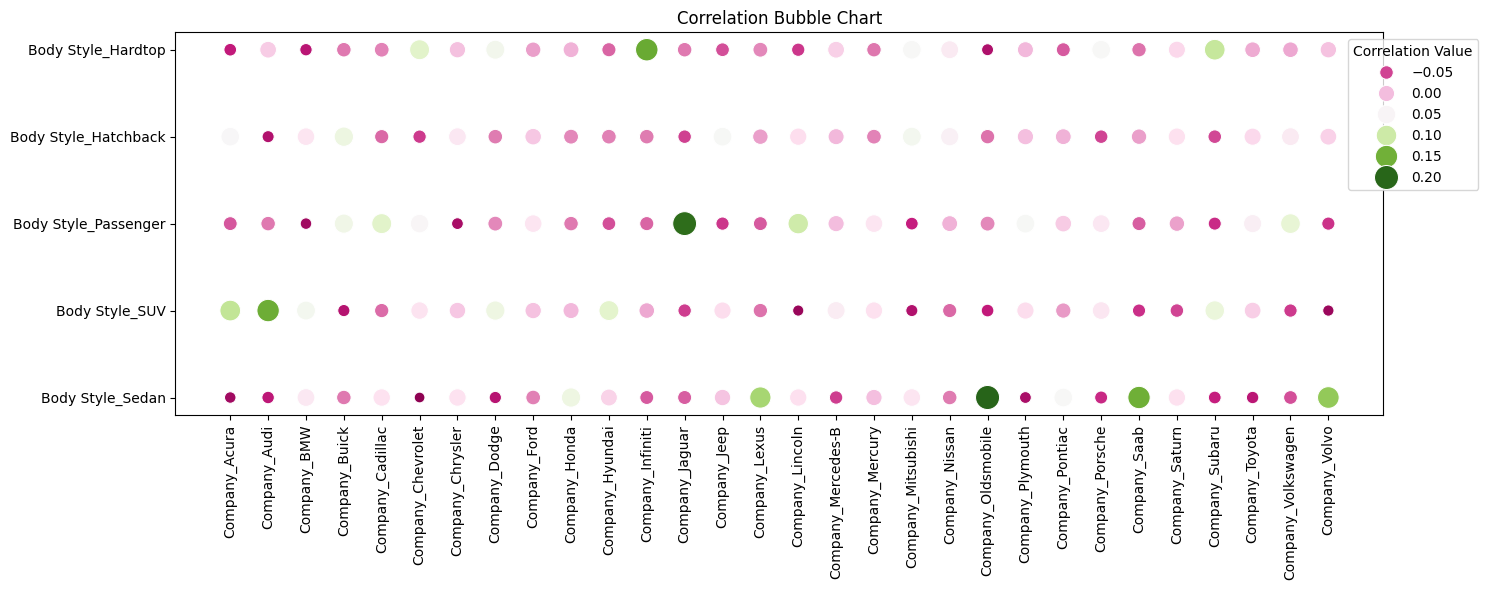

In [ ]:
# Create a correlation matrix buble plot
plt.figure(figsize=(15, 6))
sns.scatterplot(
    data=pd.melt(corr_matrix_2.reset_index(), id_vars='index'),
    x='variable',
    y='index',
    size='value',
    hue='value',
    palette='PiYG',
    alpha=1,
    sizes=(60, 300)  # Set minimum and maximum bubble size
)

# Customize legend manually for better positioning
plt.legend(bbox_to_anchor=(0.965, 1), loc='upper left', title="Correlation Value")
plt.xlabel("")
plt.ylabel("")
plt.title('Correlation Bubble Chart')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

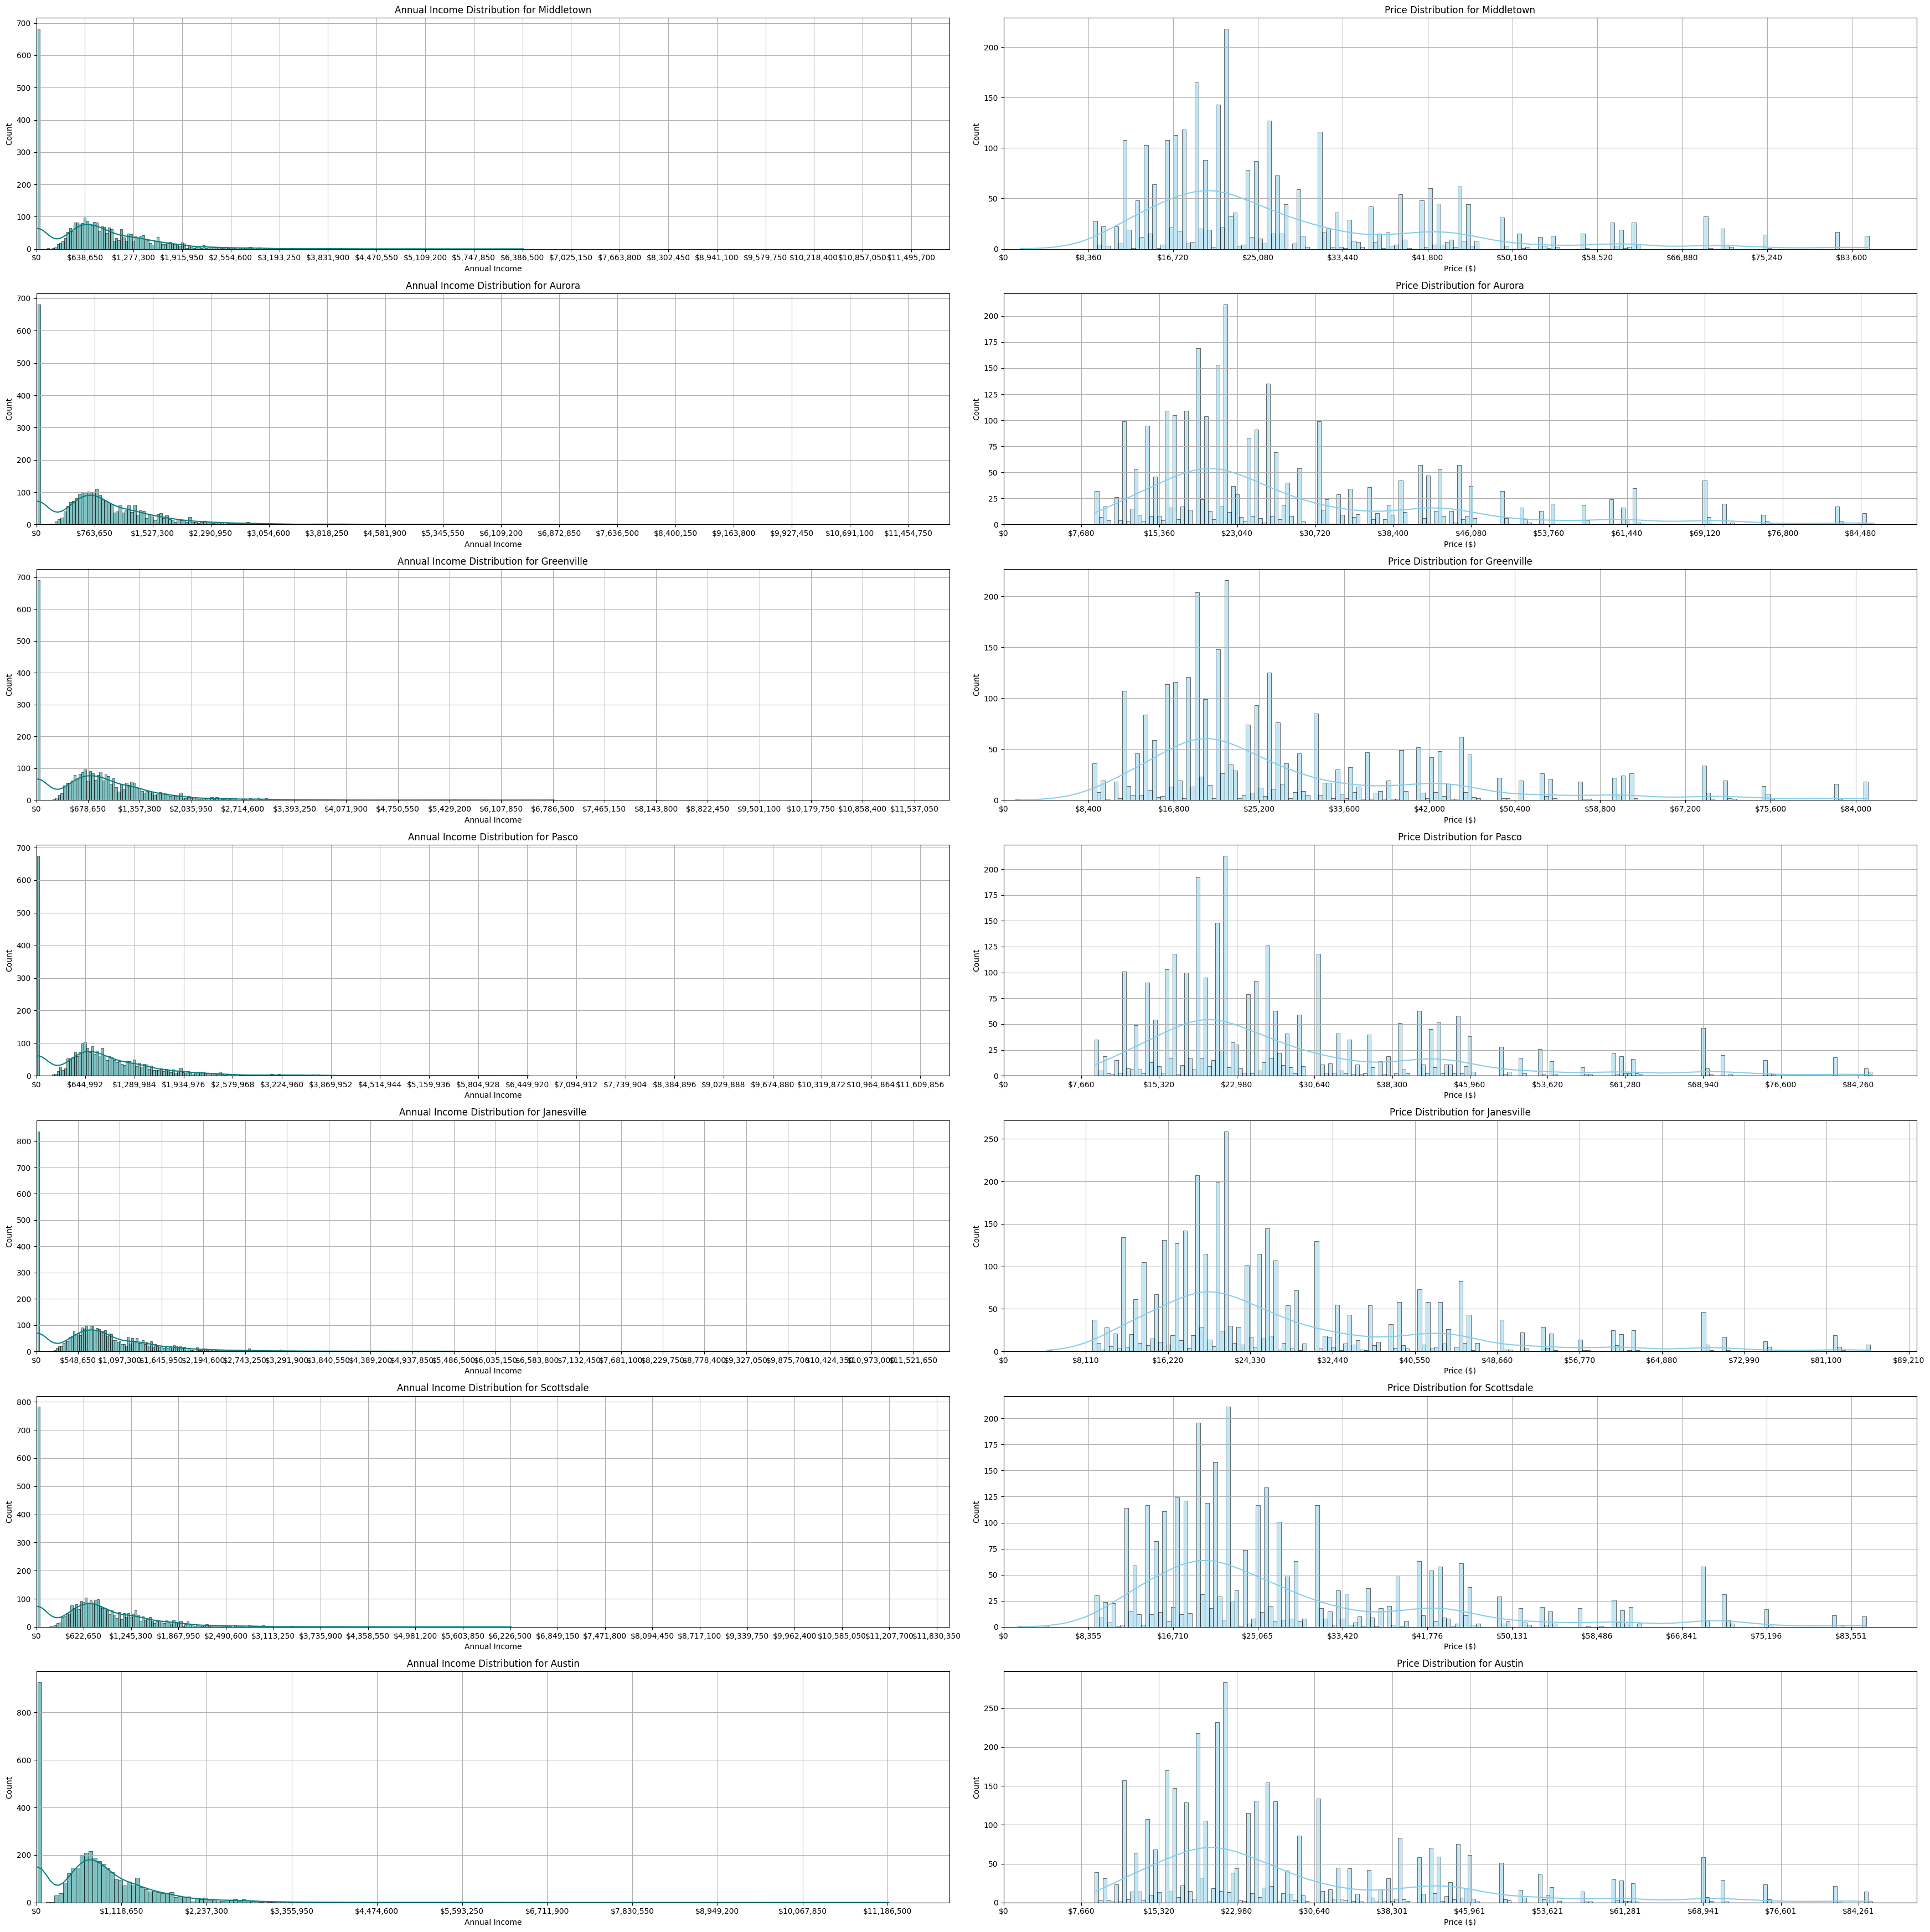

In [ ]:
# Create Subplot for 7 Regions
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(35, 35))

# Extract Unique Value in Regions
category_column = 'Dealer_Region'
unique_categories = df2[category_column].unique()

# Create loop for plot Histogram for Annual Income and Price ($)
for i, category in enumerate(unique_categories):

    # Annual Income Histogram Plot for each Regions
    category_data_income = df2[df2[category_column] == category]['Annual Income']
    sns.histplot(data=category_data_income, bins=200, kde=True, color='teal', ax=axes[i, 0])
    axes[i, 0].set_title(f'Annual Income Distribution for {category}')
    axes[i, 0].set_xlim(0, 12000000)
    axes[i, 0].grid()

    # Set x-axis ticks for Annual Income
    min_income = category_data_income.min()
    max_income = category_data_income.max()
    income_ticks = ticker.MultipleLocator((max_income - min_income) / 10)  # Adjust 10 for desired tick frequency
    axes[i, 0].xaxis.set_major_locator(income_ticks)

    # Set tickmark for Histogram Plot
    formatter_income = ticker.FuncFormatter(lambda x, pos: '${:,.0f}'.format(x))
    axes[i, 0].xaxis.set_major_formatter(formatter_income)

    # Price ($) Histogram Plot for each Regions
    category_data_price = df2[df2[category_column] == category]['Price ($)']
    sns.histplot(data=category_data_price, bins=200, kde=True, color='skyblue', ax=axes[i, 1])
    axes[i, 1].set_title(f'Price Distribution for {category}')
    axes[i, 1].set_xlim(0, 90000)
    axes[i, 1].grid()

    # Set x-axis ticks for Price ($)
    min_price = category_data_price.min()
    max_price = category_data_price.max()
    price_ticks = ticker.MultipleLocator((max_price - min_price) / 10)  # Adjust 10 for desired tick frequency
    axes[i, 1].xaxis.set_major_locator(price_ticks)

    # Set tickmark for Histogram Plot
    formatter_price = ticker.FuncFormatter(lambda x, pos: '${:,.0f}'.format(x))
    axes[i, 1].xaxis.set_major_formatter(formatter_price)

plt.tight_layout()
plt.show()

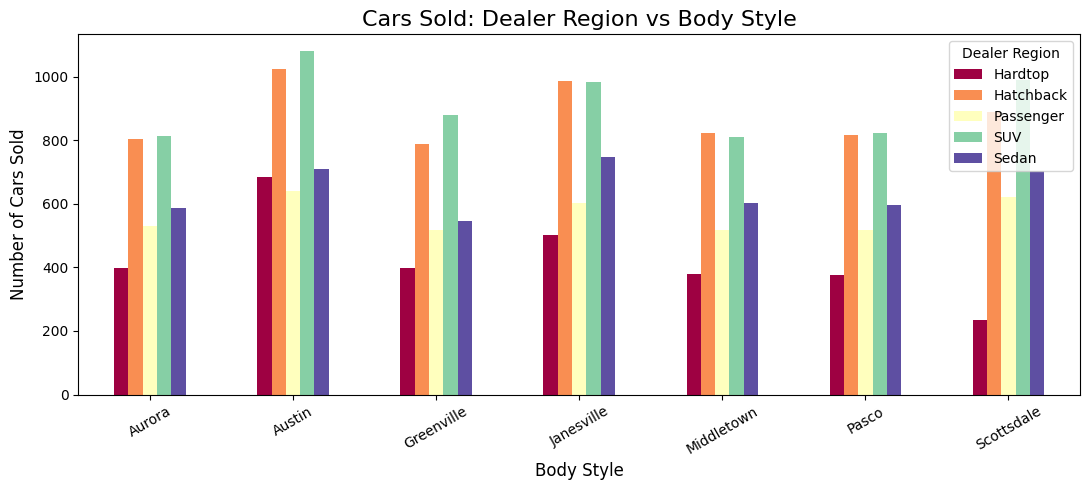

In [ ]:
# Analyze the relationship between 'Body Style' and 'Dealer_Region'
body_style_vs_region = pd.crosstab(df['Dealer_Region'], df['Body Style'])

# Create a grouped bar chart
body_style_vs_region.plot(kind='bar', figsize=(11, 5), stacked=False, colormap = 'Spectral')

# Add labels and title
plt.title('Cars Sold: Dealer Region vs Body Style', fontsize=16)
plt.xlabel('Body Style', fontsize=12)
plt.ylabel('Number of Cars Sold', fontsize=12)
plt.legend(title='Dealer Region', fontsize=10)
plt.xticks(rotation=30)

# Display the chart
plt.tight_layout()
plt.show()